# Credit EDA Assignment

Importing all necessary python libraries
- Numpy
- Pandas
- Matplotlib
- Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

Let's start with loading the provided CSV files

In [2]:
#Loading the csv files
application_data_df = pd.read_csv("application_data.csv")
previous_application_df = pd.read_csv("previous_application.csv")

Its good to have a look at the data at first to understand how and where to start

In [3]:
#Printing first dataframe
application_data_df.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Lets print out the shape of the dataframe

In [4]:
#Understanding the first dataframe 
application_data_df.shape

(307511, 122)

Now we will print out the columns to have a better understanding of how the data has been captured

In [5]:
#Column Analysis
application_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
application_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#Printing second dataframe
previous_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [8]:
#Understanding the second dataframe 
previous_application_df.shape

(1670214, 37)

In [9]:
#Column Analysis
previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
previous_application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Handling missing values in Application Data
# Finding null value percentage
null_values = (application_data_df.isnull().sum()/len(application_data_df.index)) *100
null_values = null_values[null_values>0]
null_values

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64

Text(0, 0.5, 'No. of null values')

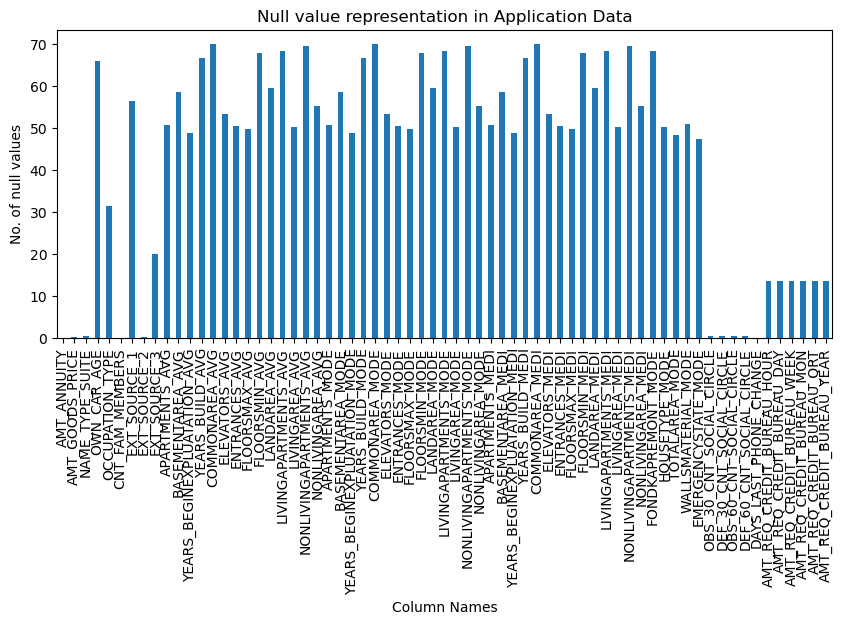

In [12]:
# Plot figure size
plt.figure(figsize = (10,4), dpi=100)
null_values.plot(kind='bar', width=0.5)
plt.title("Null value representation in Application Data")
plt.xlabel("Column Names")
plt.ylabel("No. of null values")

In [13]:
# Calculationg threshold for dropping column that have null values more than 50%
null_percent = null_values[null_values>50]
null_percent

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [14]:
#Dropping columns
app_df = application_data_df.drop(columns=null_percent.index)
app_df.shape

(307511, 81)

In [15]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [16]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [17]:
extra_cols = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','NAME_TYPE_SUITE','EXT_SOURCE_2','EXT_SOURCE_3']
app_df_cleaned = app_df.drop(columns=extra_cols)
app_df_cleaned.shape

(307511, 52)

In [18]:
app_df_cleaned.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 52 columns]

In [19]:
app_df_cleaned.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
REGION_RATING_CLIENT                 0
REGION_RATING_CLIENT_W_CITY          0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START  

In [20]:
#Dropping columns that have high percentage of missing values
extra_cols2 = ['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE']
app_df_cleaned2 = app_df_cleaned.drop(columns=extra_cols2)
app_df_cleaned2.shape

(307511, 45)

In [21]:
app_df_cleaned2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        NaN   
4                      0.0                -1106.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 45 columns]

In [22]:
app_df_cleaned2.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
REG_REGION_N

In [23]:
# Analysing OCCUPATION_TYPE for null values
app_df_cleaned2.OCCUPATION_TYPE.isnull().sum()

96391

In [24]:
# Analysing OCCUPATION_TYPE for null values
app_df_cleaned2.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [25]:
# As OCCUPATION_TYPE is a categorical variable, I can create 
# a new category for the missing values called UNKNOWN
app_df_cleaned2['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
app_df_cleaned2.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [26]:
# Checking if any null values are left in OCCUPATION_TYPE
app_df_cleaned2.OCCUPATION_TYPE.isnull().sum()

0

In [27]:
# EMERGENCYSTATE_MODE has very high number of null values hence its better to drop it for
# proper analysis
app_df_cleaned3 = app_df_cleaned2.drop(columns='EMERGENCYSTATE_MODE')
app_df_cleaned3.shape

(307511, 44)

In [28]:
app_df_cleaned3.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

In [29]:
# Start of AMT_REQ_CREDIT_BUREAU_HOUR column analysis
app_df_cleaned3.AMT_REQ_CREDIT_BUREAU_HOUR.head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [30]:
# As the amount of missing values for all credit bureau column is constant we can assume
# that for that particular record no credit score enquiry was conducted.
app_df_cleaned3.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [31]:
credit_cols_list = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for col in credit_cols_list:
    app_df_cleaned3[col] = app_df_cleaned3[col].fillna(0).astype(int)

In [32]:
app_df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [33]:
app_df_cleaned3.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [34]:
app_df_cleaned3.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [35]:
# Managing null values for social circle defaulter count
social_cols_list = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
for col in social_cols_list:
    app_df_cleaned3[col] = app_df_cleaned3[col].fillna(0).astype(int)

In [36]:
app_df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [37]:
app_df_cleaned3.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
REG_REGION_NOT_LIVE_REGION       0
REG_REGION_NOT_WORK_REGION       0
LIVE_REGION_NOT_WORK

In [38]:
# Analysing null values for column AMT_ANNUITY
app_df_cleaned3.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [39]:
# Fixing null values by imputing the mean of the column
annuity_mean = app_df_cleaned3['AMT_ANNUITY'].mean()
app_df_cleaned3['AMT_ANNUITY'].fillna(annuity_mean, inplace=True)

In [40]:
app_df_cleaned3.AMT_ANNUITY.isnull().sum()

0

In [41]:
# Analysing column AMT_GOODS_PRICE for data cleaning
app_df_cleaned3.AMT_GOODS_PRICE

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [42]:
app_df_cleaned3.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [43]:
# Replacing the null values with the column mean
goods_val_mean = app_df_cleaned3['AMT_GOODS_PRICE'].mean()
app_df_cleaned3['AMT_GOODS_PRICE'].fillna(goods_val_mean, inplace=True)

In [44]:
app_df_cleaned3.AMT_GOODS_PRICE.isnull().sum()

0

In [45]:
app_df_cleaned3.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [46]:
# Replacing the null values with the column mode
fam_members_mode = app_df_cleaned3['CNT_FAM_MEMBERS'].mean()
app_df_cleaned3['CNT_FAM_MEMBERS'].fillna(fam_members_mode, inplace=True)

In [47]:
app_df_cleaned3.CNT_FAM_MEMBERS.isnull().sum()

0

In [48]:
# Checking the amount of null values left to be treated
app_df_cleaned3.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [49]:
# Analysing the column DAYS_LAST_PHONE_CHANGE
app_df_cleaned3.DAYS_LAST_PHONE_CHANGE

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [50]:
# Calculation the absolute to change the negative values to positive
app_df_cleaned3['DAYS_LAST_PHONE_CHANGE'] = app_df_cleaned3['DAYS_LAST_PHONE_CHANGE'].abs()

In [51]:
app_df_cleaned3.DAYS_LAST_PHONE_CHANGE

0         1134.0
1          828.0
2          815.0
3          617.0
4         1106.0
           ...  
307506     273.0
307507       0.0
307508    1909.0
307509     322.0
307510     787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [52]:
# Eliminating null values
phone_change_days_mean = app_df_cleaned3['DAYS_LAST_PHONE_CHANGE'].mean()
app_df_cleaned3['DAYS_LAST_PHONE_CHANGE'].fillna(phone_change_days_mean, inplace=True)

In [53]:
app_df_cleaned3.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [54]:
# Eliminated all null values
app_df_cleaned3.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [55]:
# Converting negative values to positive
app_df_cleaned3.DAYS_BIRTH = app_df_cleaned3.DAYS_BIRTH.abs()
app_df_cleaned3.DAYS_EMPLOYED = app_df_cleaned3.DAYS_EMPLOYED.abs()
app_df_cleaned3.DAYS_REGISTRATION = app_df_cleaned3.DAYS_REGISTRATION.abs()
app_df_cleaned3.DAYS_ID_PUBLISH = app_df_cleaned3.DAYS_ID_PUBLISH.abs()

In [56]:
# Creating a new column after calculating age from DAYS_BIRTH
app_df_cleaned3['AGE'] = round(app_df_cleaned3['DAYS_BIRTH'] / 365.25)

In [57]:
app_df_cleaned3['AGE']

0         26.0
1         46.0
2         52.0
3         52.0
4         55.0
          ... 
307506    26.0
307507    57.0
307508    41.0
307509    33.0
307510    46.0
Name: AGE, Length: 307511, dtype: float64

In [58]:
app_df_cleaned3

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  \
0           24700.5  ...                         2                        2   
1           35698.5  ...                         1                        0   
2            6750.0  ...                         0                        0   
3           29686.5  ...                         2                        0   
4           21865.5  ...                         0                        0   
...             ...  ...                       ...                      ...   
307506      27558.0  ...                         0                        0   
307507      12001.5  ...                         0                        0   
307508      29979.0  ...                         6                        0   
307509      20205.0  ...                         0                        0   
307510      49117.5  ...                         0                        0   

       DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      1134.0                          0   
1                       828.0                          0   
2                       815.0                          0   
3                       617.0                          0   
4                      1106.0                          0   
...                       ...                        ...   
307506                  273.0                          0   
307507                    0.0                          0   
307508                 1909.0                          1   
307509                  322.0                          0   
307510                  787.0                          0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
307506                         0                           0   
307507                         0                           0   
307508                         0

In [59]:
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [60]:
app_df_cleaned3.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [61]:
app_df_cleaned3['CODE_GENDER']=app_df_cleaned3['CODE_GENDER'].replace('XNA', 'F')

In [62]:
app_df_cleaned3['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [63]:
app_df_cleaned3.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [64]:
app_df_cleaned3['NAME_FAMILY_STATUS']=app_df_cleaned3['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [65]:
app_df_cleaned3.NAME_FAMILY_STATUS.value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

In [66]:
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [67]:
app_df_cleaned3.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [68]:
# Organising categories under ORGANISATION_TYPE
business_map = {
    'Business Entity Type 3':'Business',
    'Business Entity Type 2':'Business',
    'Business Entity Type 1':'Business'
}
trade_map = {
    'Trade: type 7':'Trade',
    'Trade: type 3':'Trade',
    'Trade: type 2':'Trade',
    'Trade: type 6':'Trade',
    'Trade: type 1':'Trade',
    'Trade: type 4':'Trade',
    'Trade: type 5':'Trade'
}
transport_map = {
    'Transport: type 4':'Transport',
    'Transport: type 2':'Transport',
    'Transport: type 3':'Transport',
    'Transport: type 1':'Transport'
}
industry_map = {
    'Industry: type 9':'Industry',
    'Industry: type 3':'Industry',
    'Industry: type 11':'Industry',
    'Industry: type 7':'Industry',
    'Industry: type 1':'Industry',
    'Industry: type 4':'Industry',
    'Industry: type 5':'Industry',
    'Industry: type 2':'Industry',
    'Industry: type 12':'Industry',
    'Industry: type 6':'Industry',
    'Industry: type 10':'Industry',
    'Industry: type 13':'Industry',
    'Industry: type 8':'Industry'
}

In [69]:
app_df_cleaned3['ORGANIZATION_TYPE'] = app_df_cleaned3['ORGANIZATION_TYPE'].replace(business_map)

In [70]:
app_df_cleaned3['ORGANIZATION_TYPE'] = app_df_cleaned3['ORGANIZATION_TYPE'].replace(trade_map)

In [71]:
app_df_cleaned3['ORGANIZATION_TYPE'] = app_df_cleaned3['ORGANIZATION_TYPE'].replace(transport_map)

In [72]:
app_df_cleaned3['ORGANIZATION_TYPE'] = app_df_cleaned3['ORGANIZATION_TYPE'].replace(industry_map)

In [73]:
app_df_cleaned3['ORGANIZATION_TYPE'] = app_df_cleaned3['ORGANIZATION_TYPE'].replace('XNA','Unknown')

In [74]:
app_df_cleaned3.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business               84529
Unknown                55374
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 

In [75]:
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

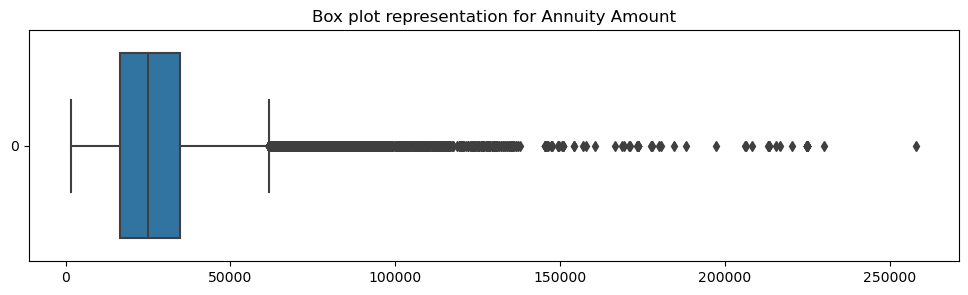

In [76]:
# Box plot for visual analysis
plt.figure(figsize = (12,3))
sns.boxplot(app_df_cleaned3['AMT_ANNUITY'],orient='h')
plt.title('Box plot representation for Annuity Amount')
plt.show()

The above box plot showcases many outliers, these can mean the following:
1) They can represent very large amount of loans or unusual cases
2) It can be a human error like misplacement of a decimal etc.
3) May represent VIP clients

In [77]:
# Verifying if point 2 is valid or not
app_df_cleaned3.AMT_ANNUITY.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_ANNUITY
Non-Null Count   Dtype  
--------------   -----  
307511 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [78]:
app_df_cleaned3.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.573909
std       14493.454517
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [79]:
# Analysing column with the max loan value
max_annuity = app_df_cleaned3['AMT_ANNUITY'].idxmax()
app_df_cleaned3.loc[max_annuity]

SK_ID_CURR                                   120926
TARGET                                            0
NAME_CONTRACT_TYPE                       Cash loans
CODE_GENDER                                       M
FLAG_OWN_CAR                                      Y
FLAG_OWN_REALTY                                   N
CNT_CHILDREN                                      2
AMT_INCOME_TOTAL                           783000.0
AMT_CREDIT                                4050000.0
AMT_ANNUITY                                258025.5
AMT_GOODS_PRICE                           4050000.0
NAME_INCOME_TYPE               Commercial associate
NAME_EDUCATION_TYPE                Higher education
NAME_FAMILY_STATUS                          Married
NAME_HOUSING_TYPE                 House / apartment
REGION_POPULATION_RELATIVE                 0.009549
DAYS_BIRTH                                    15176
DAYS_EMPLOYED                                   201
DAYS_REGISTRATION                            1529.0
DAYS_ID_PUBL

In [80]:
#Identifying Outliers

app_df_cleaned3.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307511.000000     3.075110e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.454517     3.692794e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868   16036.995067   67724.742149  ...   
std                      0.013831    4363.988632  139443.751806  ...   
min                      0.000290    7489.000000       0.000000  ...   
25%                      0.010006   12413.000000     933.000000  ...   
50%                      0.018850   15750.000000    2219.000000  ...   
75%                      0.028663   19682.000000    5707.000000  ...   
max                      0.072508   25229.000000  365243.000000  ...   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             307511.000000             307511.000000   
mean                   1.400626                  0.099717   
std                    2.377224                  0.361735   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           307511.000000               307511.000000   
mean               962.858788                    0.005538   
std                826.807143                    0.078014   
min                  0.000000                    0.000000   
25%                274.000000                    0.000000   
50%                757.000000                    0.000000   
75%               1570.000000                    0.000000   
max               4292.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              307511.000000               307511.000000   
mean                    0.006055                    0.029723   
std                     0.103037                    0.190728   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307511.000000              307511.000000   
mean                    0.231293                   0.229631   
std                     0.856810                   0.744059   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000   

From describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

In [81]:
import itertools # using itertools for efficient looping plotting subplots

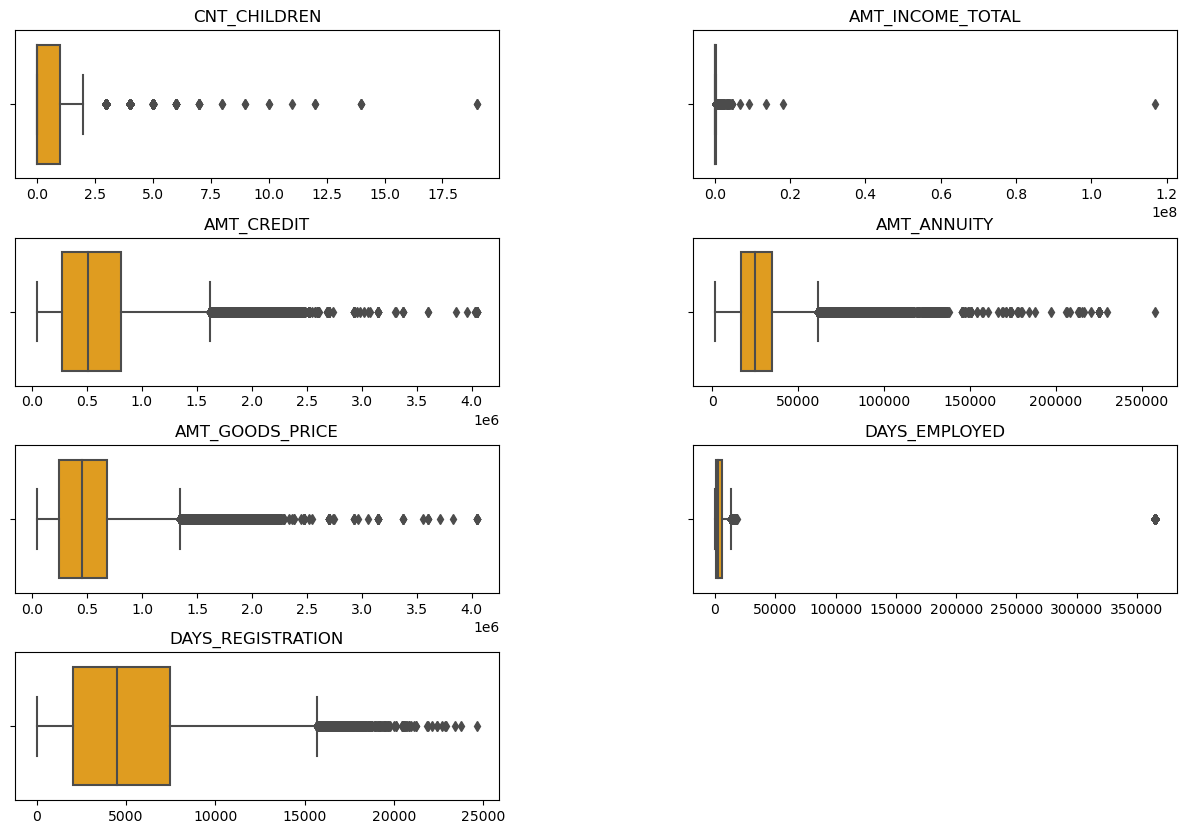

In [82]:
outliers_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
                "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

plt.figure(figsize=[15,10])
for i,j in itertools.zip_longest(outliers_col, range(len(outliers_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(x = app_df_cleaned3[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [83]:
# Capping values at their 99th percentile
for col in outliers_col:
    percentile_value = app_df_cleaned3[col].quantile(0.99)
    app_df_cleaned3[col] = app_df_cleaned3[col].clip(upper=percentile_value)

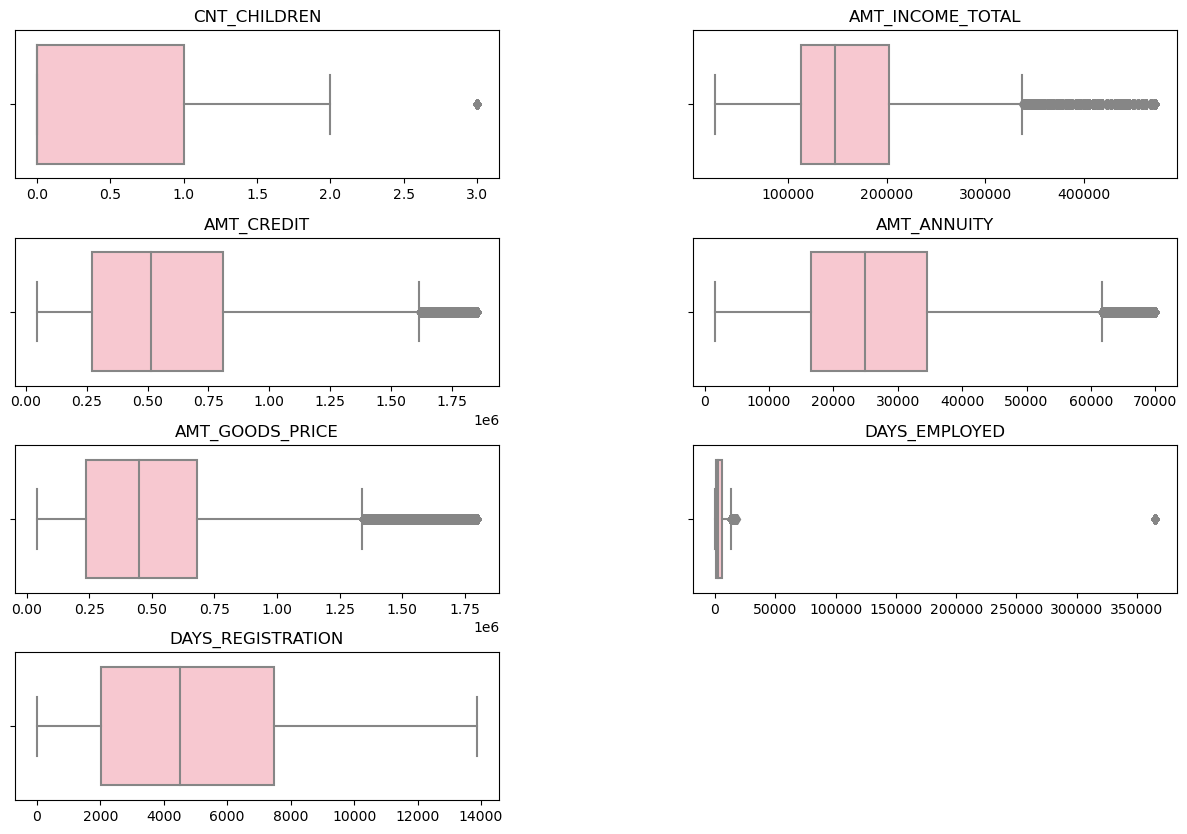

In [84]:
# Plotting the boxplots after capping
plt.figure(figsize=[15,10])
for i, j in itertools.zip_longest(outliers_col, range(len(outliers_col))):
    plt.subplot(4, 2, j+1)
    sns.boxplot(x=app_df_cleaned3[i], orient="h", color="pink")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [85]:
app_df_cleaned3.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [86]:
max_value = app_df_cleaned3['DAYS_EMPLOYED'].max()
median_value = app_df_cleaned3['DAYS_EMPLOYED'].median()
app_df_cleaned3['DAYS_EMPLOYED'] = app_df_cleaned3['DAYS_EMPLOYED'].replace(max_value, median_value)

In [87]:
# Verify the changes
app_df_cleaned3['DAYS_EMPLOYED'].describe()

count    307511.000000
mean       2354.427019
std        2118.332916
min           0.000000
25%         933.000000
50%        2219.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

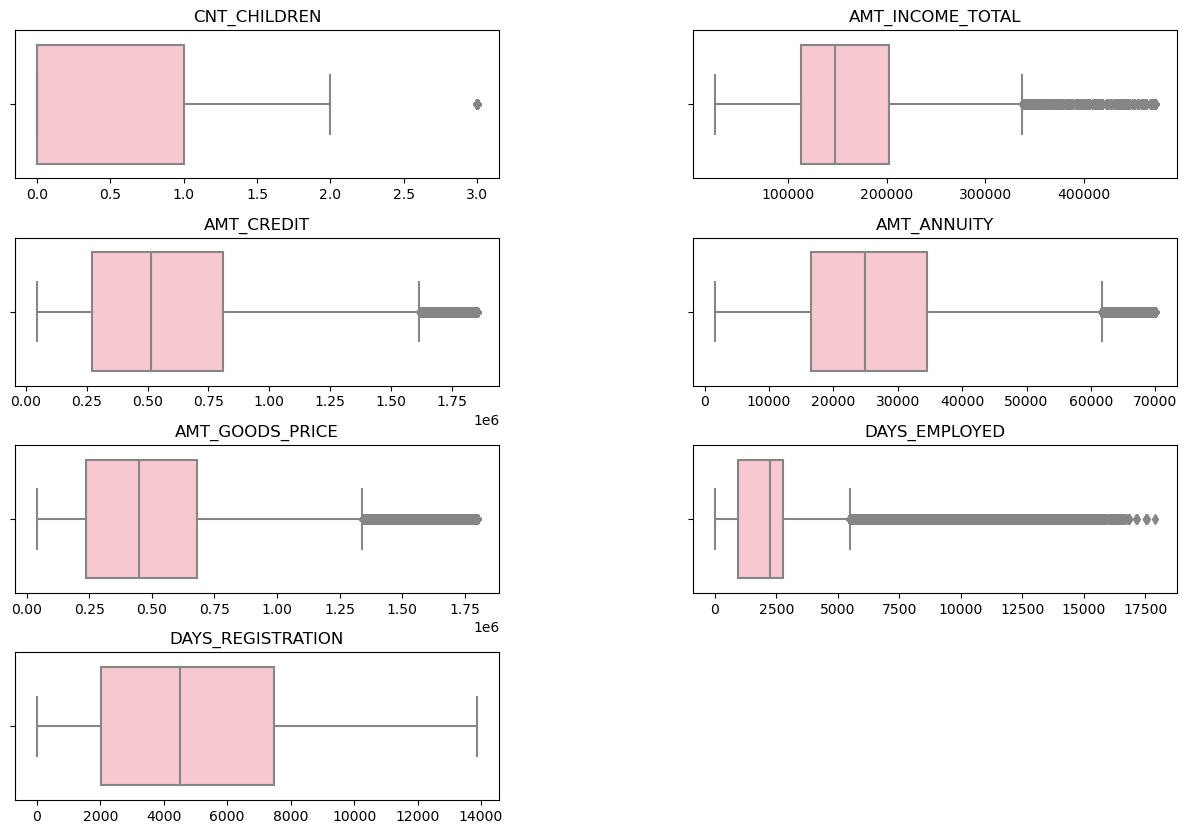

In [88]:
plt.figure(figsize=[15,10])
for i, j in itertools.zip_longest(outliers_col, range(len(outliers_col))):
    plt.subplot(4, 2, j+1)
    sns.boxplot(x=app_df_cleaned3[i], orient="h", color="pink")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

In [89]:
# This outlier seems to be a genuine value
app_df_cleaned3['CNT_CHILDREN'].quantile(0.99)

3.0

In [90]:
# Now cleaning Previous application dataset

In [91]:
previous_application_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [92]:
previous_application_df.shape

(1670214, 37)

In [93]:
previous_application_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [94]:
previous_application_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [95]:
previous_application_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [96]:
null_values_in_prev = (previous_application_df.isnull().sum()/len(previous_application_df.index)) *100
null_values_in_prev = null_values_in_prev[null_values_in_prev>0]
null_values_in_prev

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

Text(0, 0.5, 'No. of null values')

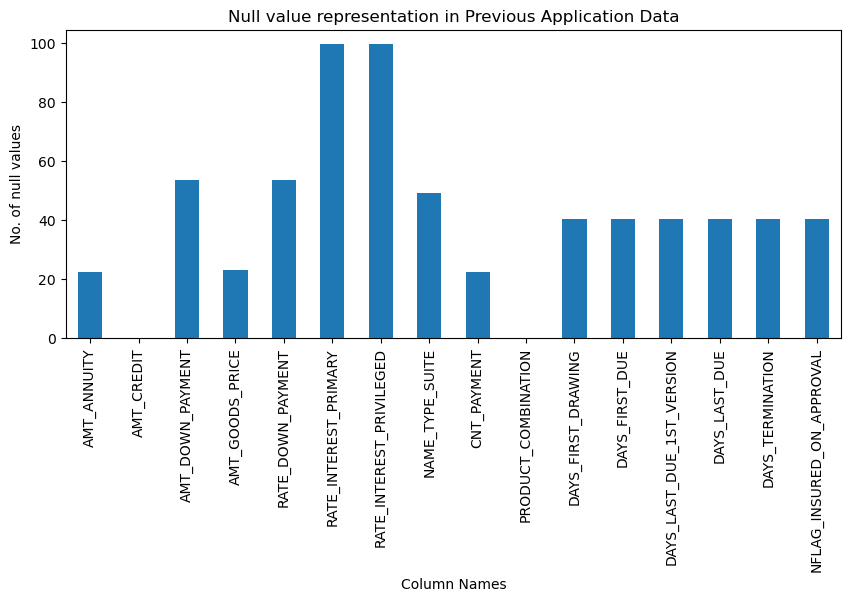

In [97]:
# Plot figure size
plt.figure(figsize = (10,4), dpi=100)
null_values_in_prev.plot(kind='bar', width=0.5)
plt.title("Null value representation in Previous Application Data")
plt.xlabel("Column Names")
plt.ylabel("No. of null values")

In [98]:
null_percent_in_prev = null_values_in_prev[null_values_in_prev>50]
null_percent_in_prev

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [99]:
prev_df = previous_application_df.drop(columns=null_percent_in_prev.index)
prev_df.shape

(1670214, 33)

In [100]:
prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 33 columns]

In [101]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [102]:
prev_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [103]:
days_cols = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL']
for col in days_cols:
    prev_df[col] = prev_df[col].fillna(0).astype(int)

In [104]:
prev_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [105]:
prev_df.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [106]:
annu_mean = prev_df['AMT_ANNUITY'].mean()
prev_df['AMT_ANNUITY'].fillna(annu_mean, inplace=True)

In [107]:
prev_df.AMT_ANNUITY.isnull().sum()

0

In [108]:
prev_df.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [109]:
goods_mean = prev_df['AMT_GOODS_PRICE'].mean()
prev_df['AMT_GOODS_PRICE'].fillna(goods_mean, inplace=True)

In [110]:
prev_df.AMT_GOODS_PRICE.isnull().sum()

0

In [111]:
# This is an unecessary column, hence dropping it
prev_df.drop(columns='NAME_TYPE_SUITE', inplace=True)

In [112]:
prev_df.shape

(1670214, 32)

In [113]:
prev_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

In [114]:
prev_df.CNT_PAYMENT

0          12.0
1          36.0
2          12.0
3          12.0
4          24.0
           ... 
1670209    30.0
1670210    12.0
1670211    10.0
1670212    12.0
1670213    48.0
Name: CNT_PAYMENT, Length: 1670214, dtype: float64

In [115]:
prev_df['CNT_PAYMENT'] = prev_df['CNT_PAYMENT'].fillna(0)

In [116]:
prev_df.CNT_PAYMENT.isnull().sum()

0

In [117]:
prev_df.PRODUCT_COMBINATION.value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [118]:
prod_mode = prev_df['PRODUCT_COMBINATION'].mode()
prod_mode[0]

'Cash'

In [119]:
prev_df['PRODUCT_COMBINATION'].fillna(prod_mode[0], inplace=True)

In [120]:
prev_df.PRODUCT_COMBINATION.isnull().sum()

0

In [121]:
prev_df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
DAYS_TERMI

In [122]:
cred_mode = prev_df['AMT_CREDIT'].mode()
cred_mode[0]

0.0

In [123]:
prev_df['AMT_CREDIT'].fillna(cred_mode[0], inplace=True)

In [124]:
prev_df.AMT_CREDIT.isnull().sum()

0

In [125]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [126]:
prev_df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

In [127]:
contract_mode = prev_df['NAME_CONTRACT_TYPE'].mode()
contract_mode[0]

'Cash loans'

In [128]:
prev_df['NAME_CONTRACT_TYPE'] = prev_df['NAME_CONTRACT_TYPE'].replace('XNA', contract_mode[0])

In [129]:
prev_df.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

In [130]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [131]:
prev_df.HOUR_APPR_PROCESS_START.value_counts()

HOUR_APPR_PROCESS_START
11    192728
12    185980
10    181690
13    172256
14    157711
15    142965
9     127002
16    121361
17     95064
8      73085
18     64156
7      45646
19     34089
6      25759
5      15392
20     14535
4       9319
3       5035
21      4082
2       1116
22       720
1        212
23       202
0        109
Name: count, dtype: int64

In [132]:
prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [133]:
prev_df.shape

(1670214, 32)

In [134]:
# As the unknown data is close to approx 90% of the total entires 
# This data can be seen present under the names 'XNA' and 'XAP'
# Hence dropping the column
prev_df.drop(columns='NAME_CASH_LOAN_PURPOSE', inplace=True)

In [135]:
prev_df.shape

(1670214, 31)

In [136]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [137]:
prev_df.NAME_PAYMENT_TYPE.value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

In [138]:
# As the XNA (null) values are around 60% of the total values, we will drop this column
prev_df.drop(columns='NAME_PAYMENT_TYPE', inplace=True)

In [139]:
prev_df.shape

(1670214, 30)

In [140]:
prev_df.CODE_REJECT_REASON.value_counts()

CODE_REJECT_REASON
XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: count, dtype: int64

In [141]:
# Null values exceed 80% of total hence dropping the column
prev_df.drop(columns='CODE_REJECT_REASON', inplace=True)

In [142]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [143]:
prev_df.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

In [144]:
ctype_mode = prev_df['NAME_CLIENT_TYPE'].mode()
ctype_mode[0]

'Repeater'

In [145]:
prev_df['NAME_CLIENT_TYPE'] = prev_df['NAME_CLIENT_TYPE'].replace('XNA', ctype_mode[0])

In [146]:
prev_df.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1233202
New           301363
Refreshed     135649
Name: count, dtype: int64

In [147]:
prev_df.NAME_GOODS_CATEGORY.value_counts()

NAME_GOODS_CATEGORY
XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1


In [148]:
# Null values accounting to 57%, hence will drop it
prev_df.drop(columns='NAME_GOODS_CATEGORY', inplace=True)

In [149]:
prev_df.shape

(1670214, 28)

In [150]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [151]:
prev_df.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: count, dtype: int64

In [152]:
portfolio_mode = prev_df['NAME_PORTFOLIO'].mode()
portfolio_mode[0]

'POS'

In [153]:
prev_df['NAME_PORTFOLIO'] = prev_df['NAME_PORTFOLIO'].replace('XNA', portfolio_mode[0])

In [154]:
prev_df.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      1063241
Cash      461563
Cards     144985
Cars         425
Name: count, dtype: int64

In [155]:
prev_df.NAME_PRODUCT_TYPE.value_counts()

NAME_PRODUCT_TYPE
XNA        1063666
x-sell      456287
walk-in     150261
Name: count, dtype: int64

In [156]:
# Null values accounting to more than 65%, hence will drop it
prev_df.drop(columns='NAME_PRODUCT_TYPE', inplace=True)

In [157]:
prev_df.SELLERPLACE_AREA.describe()

count    1.670214e+06
mean     3.139511e+02
std      7.127443e+03
min     -1.000000e+00
25%     -1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

In [158]:
prev_df['SELLERPLACE_AREA'] = prev_df['SELLERPLACE_AREA'].abs()

In [159]:
prev_df.SELLERPLACE_AREA.describe()

count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64

In [160]:
prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [161]:
prev_df.NAME_SELLER_INDUSTRY.value_counts()

NAME_SELLER_INDUSTRY
XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: count, dtype: int64

In [162]:
# Null values accounting to 50%
prev_df.drop(columns='NAME_SELLER_INDUSTRY', inplace=True)

In [163]:
prev_df.shape

(1670214, 26)

In [164]:
prev_df.NAME_YIELD_GROUP.value_counts()

NAME_YIELD_GROUP
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [165]:
prev_df.NAME_YIELD_GROUP.describe()

count     1670214
unique          5
top           XNA
freq       517215
Name: NAME_YIELD_GROUP, dtype: object

In [166]:
prev_df['NAME_YIELD_GROUP'] = prev_df['NAME_YIELD_GROUP'].replace('XNA','Unknown')

In [167]:
prev_df.DAYS_DECISION.value_counts()

DAYS_DECISION
-245     2444
-238     2390
-210     2375
-273     2350
-196     2315
         ... 
-2882     163
-2922     162
-2921     158
-2902     148
-1          2
Name: count, Length: 2922, dtype: int64

In [168]:
days_prev_list = ['DAYS_DECISION','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION']
for col in days_prev_list:
    prev_df[col] = prev_df[col].abs()

In [169]:
prev_df.DAYS_DECISION.value_counts()

DAYS_DECISION
245     2444
238     2390
210     2375
273     2350
196     2315
        ... 
2882     163
2922     162
2921     158
2902     148
1          2
Name: count, Length: 2922, dtype: int64

In [170]:
# Checking for outliers
prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.303122e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.544967e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670214e+06     1.670214e+06             1.670214e+06   
mean   1.961139e+05     2.278473e+05             1.248418e+01   
std    3.185746e+05     2.766123e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.728000e+05             1.200000e+01   
75%    2.164185e+05     2.278473e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  \
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06   
mean             9.964675e-01   8.806797e+02      3.148644e+02  1.247621e+01   
std              5.932963e-02   7.790997e+02      7.127403e+03  1.447588e+01   
min              0.000000e+00   1.000000e+00      0.000000e+00  0.000000e+00   
25%              1.000000e+00   2.800000e+02      1.000000e+00  0.000000e+00   
50%              1.000000e+00   5.810000e+02      3.000000e+00  1.000000e+01   
75%              1.000000e+00   1.300000e+03      8.200000e+01  1.600000e+01   
max              1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count        1.670214e+06    1.670214e+06               1.670214e+06   
mean         2.043834e+05    9.521985e+03               2.015999e+04   
std          1.812813e+05    5.618513e+04               8.421012e+04   
min          0.000000e+00    0.000000e+00              -2.801000e+03   
25%          0.000000e+00    0.000000e+00              -5.800000e+02   
50%          3.652430e+05    3.360000e+02               0.000000e+00   
75%          3.652430e+05    1.132000e+03               0.000000e+00   
max          3.652430e+05    3.652430e+05               3.652430e+05   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count   1.670214e+06      1.670214e+06               1.670214e+06  
mean    4.665864e+04      4.985451e+04               1.985506e-01  
std     1.212198e+05      1.247367e+05               3.989090e-01  
min     0.000000e+00      0.000000e+00               0.000000e+00  
25%     0.000000e+00      0.000000e+00               0.000000e+00  
50%     2.920000e+02      2.830000e+02               0.000000e+00  
75%     1.518000e+03      1.544000e+03               0.000000e+00  
max     3.652430e+05      3.652430e+05               1.000000e+00

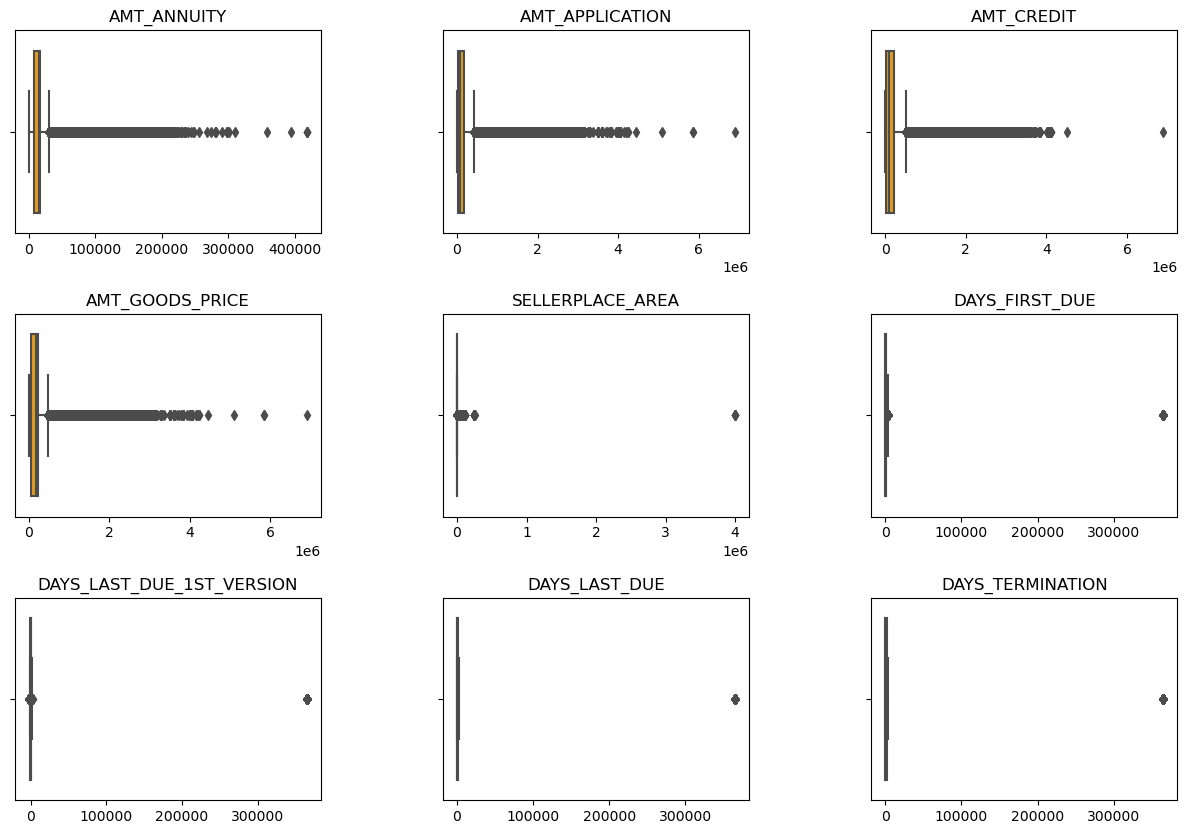

In [171]:
possible_outlier_cols = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
plt.figure(figsize=[15,10])
for i,j in itertools.zip_longest(possible_outlier_cols, range(len(possible_outlier_cols))):
    plt.subplot(3,3,j+1)
    sns.boxplot(x = prev_df[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [172]:
for col in possible_outlier_cols:
    percentile_value = prev_df[col].quantile(0.99)
    prev_df[col] = prev_df[col].clip(upper=percentile_value)

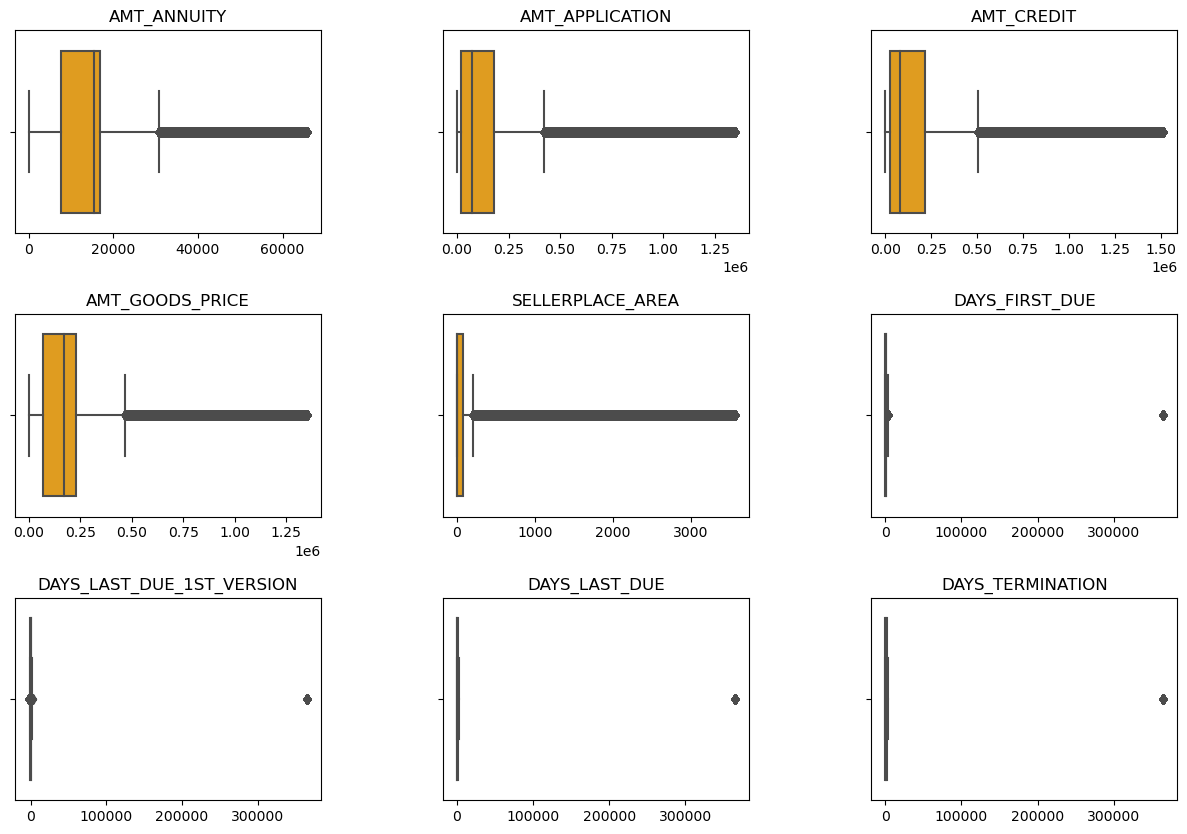

In [173]:
plt.figure(figsize=[15,10])
for i,j in itertools.zip_longest(possible_outlier_cols, range(len(possible_outlier_cols))):
    plt.subplot(3,3,j+1)
    sns.boxplot(x = prev_df[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [174]:
days_outlier_list = ['DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for col in days_outlier_list:
    max_val = prev_df[col].max()
    med_val = prev_df[col].median()
    prev_df[col] = prev_df[col].replace(max_val,med_val)

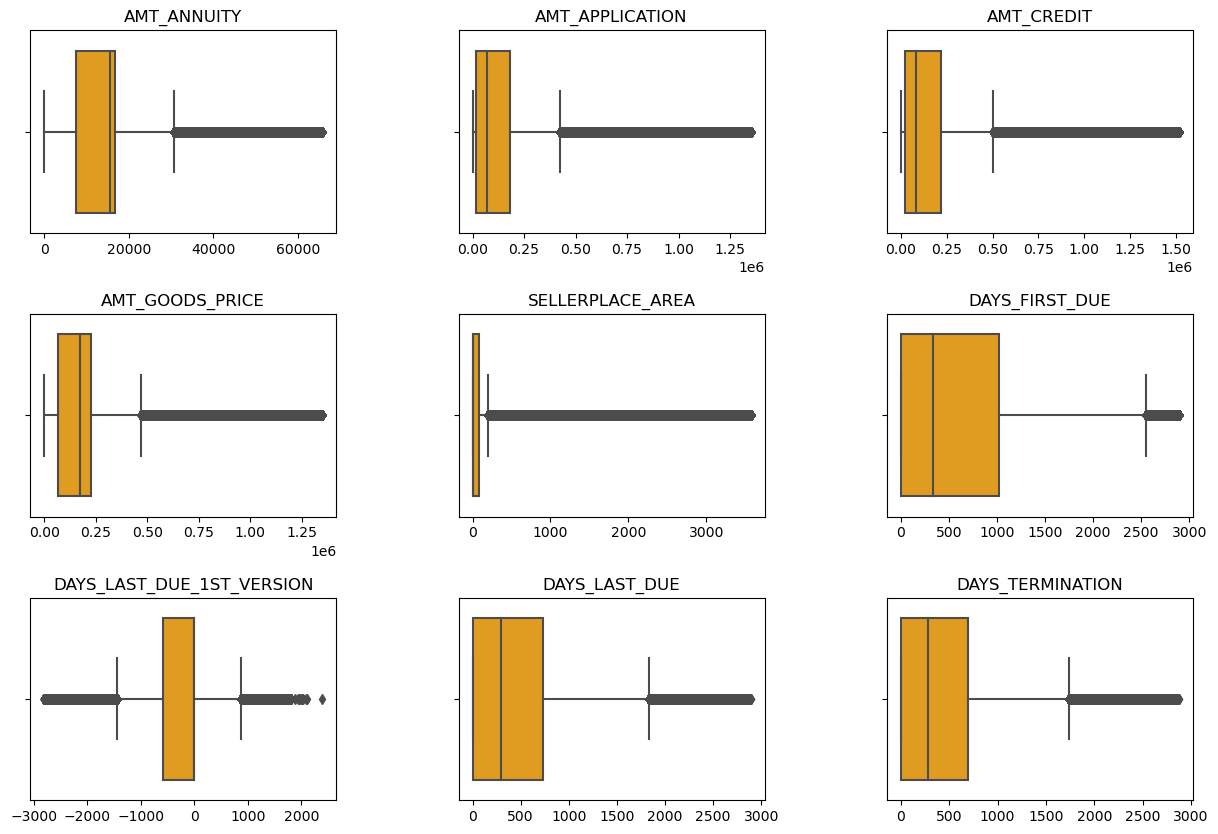

In [175]:
plt.figure(figsize=[15,10])
for i,j in itertools.zip_longest(possible_outlier_cols, range(len(possible_outlier_cols))):
    plt.subplot(3,3,j+1)
    sns.boxplot(x = prev_df[i], orient = "h", color = "orange")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [176]:
# Lets Start with the data analysis part

Imbalance in Data:
Identify and address any data imbalance issues in the dataset.

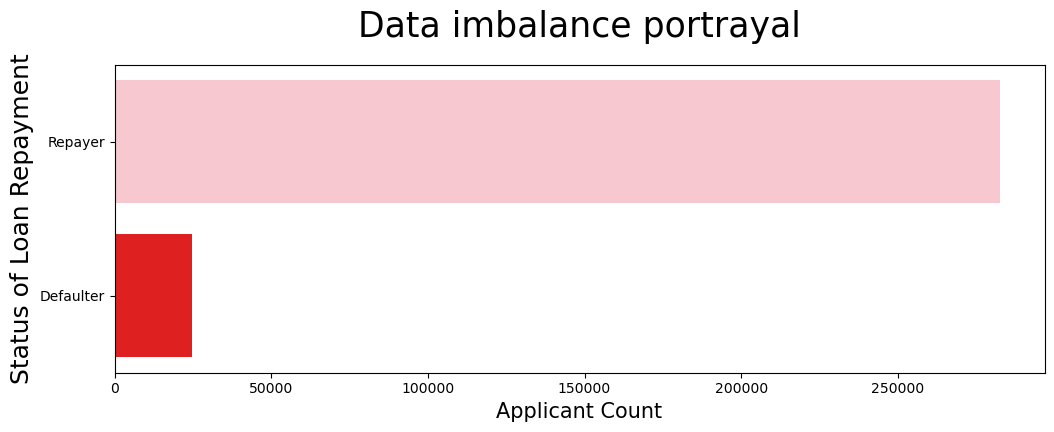

In [177]:
plt.figure(figsize= [12,4])
sns.barplot(y=["Repayer","Defaulter"], x = app_df_cleaned3["TARGET"].value_counts(), palette = ["pink","r"])
plt.ylabel("Status of Loan Repayment",fontdict = {"fontsize":18})
plt.xlabel("Applicant Count",fontdict = {"fontsize":15})
plt.title("Data imbalance portrayal", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [178]:
# Accurate values of people repaying the loan amount
re = round((app_df_cleaned3["TARGET"].value_counts()[0]/len(app_df_cleaned3)* 100),2)
print(f"Total Percentage of people repaying the loan is {re}%")


Total Percentage of people repaying the loan is 91.93%


In [179]:
# Accurate values of people defaulting the loan amount
de = round((app_df_cleaned3["TARGET"].value_counts()[1]/len(app_df_cleaned3)* 100),2)
print(f"Total Percentage of people becoming defaulters is {de}%")

Total Percentage of people becoming defaulters is 8.07%


Explore and analyze categorical variables in the dataset.

In [180]:
# Changing columns with type object to categorical
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [181]:
potential_categorical_var = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

In [182]:
for col in potential_categorical_var:
    app_df_cleaned3[col] = pd.Categorical(app_df_cleaned3[col])

In [183]:
app_df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  category
 12  NAME_EDUCATION_TYPE          307511 non-null

In [184]:
# List of numerical and categorical types in a dataframe
num_types = ['int64','float64']

categorical_list = list(app_df_cleaned3.select_dtypes(["category"]).columns)   
numerical_list = list(app_df_cleaned3.select_dtypes(["int","float"]).columns)

In [185]:
# Writing a function to help plot figures for univariate analysis
def plot_univariate(data, col, target):
    if data[col].dtype == 'category' or data[col].dtype == 'object':  # Categorical
        types = data[col].unique()
        for t in types:
            filtered_df = data[data[col] == t]
            plt.figure(figsize=(4, 4))
            filtered_df[target].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
            plt.title(f'Pie Chart for {t}')
            plt.show()
    else:  # Numerical
        plt.figure(figsize=(10, 6))
        sns.histplot(data=data, x=col, hue=target, multiple="stack", kde=True)
        plt.title(f'Histogram for {col} with respect to {target}')
        plt.xlabel(col)
        plt.show()


In [186]:
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

# Visual analysis between Loan type and Target 

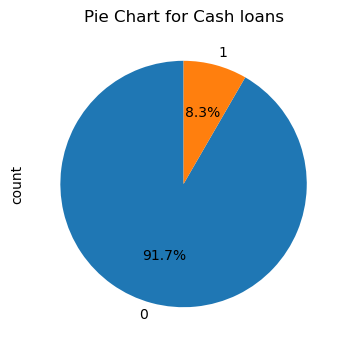

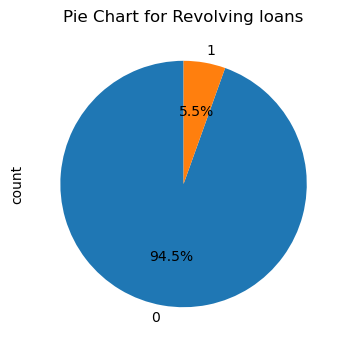

In [187]:
plot_univariate(app_df_cleaned3,"NAME_CONTRACT_TYPE","TARGET")

- In case of Cash Loans, 8.3% were defaulters whereas 91.7% were on-time payers
- In case of Revolving Loans, 5.5% were defaulters whereas 94.5% were on-time payers

# Visual analysis between Pending Credit Amount and Target

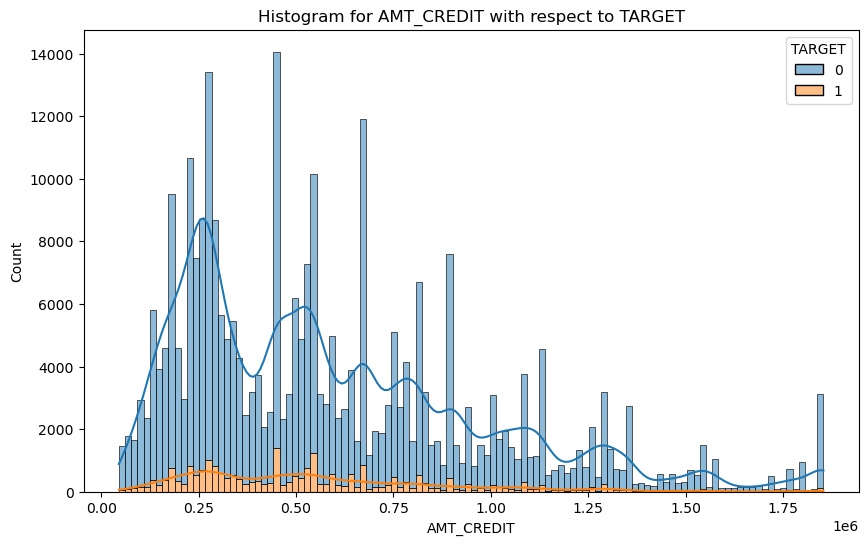

In [188]:
plot_univariate(app_df_cleaned3,"AMT_CREDIT","TARGET")

- The highest number of defaulters (count between 1000-2000) had credit pending of amounts upto 5 Lakh 
- Most defaulters seems to lie within the range of pending credit between 1.25 Lakh to 7.5 lakh
- We don't see any promising pattern as to defaulters relating to pending 

# Visual analysis between Applicant Gender and Target

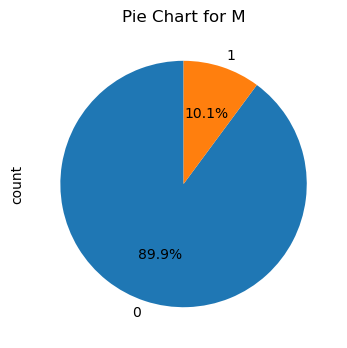

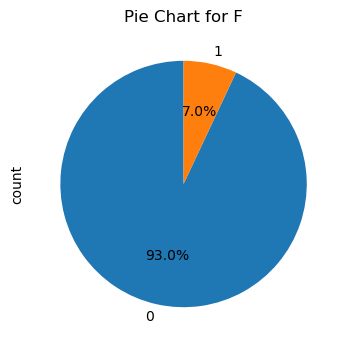

In [189]:
plot_univariate(app_df_cleaned3,"CODE_GENDER","TARGET")

- Accounting to female applicants, defaulters were found to be 7% of the total loan bearers
- Accounting to male applicants, defaulters were found to be 10.1% of the total loan bearers

# Visual analysis between Applicant Age and Target

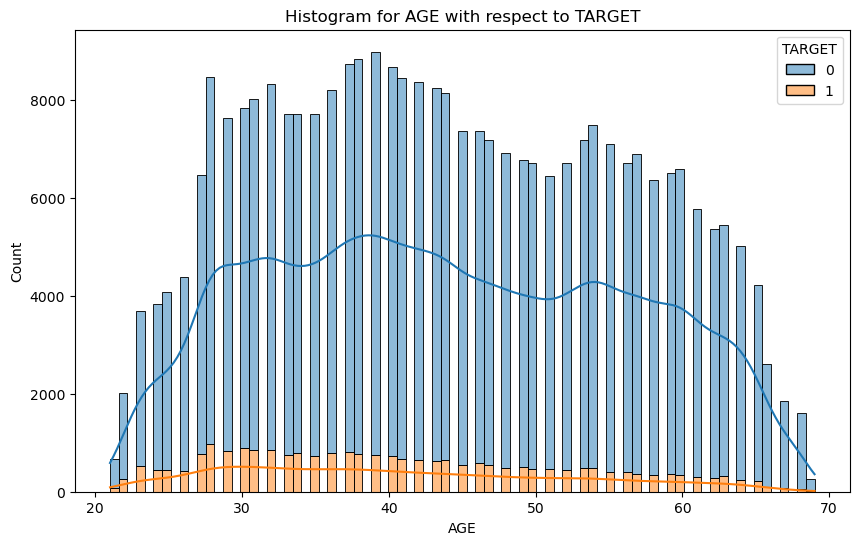

In [190]:
plot_univariate(app_df_cleaned3,"AGE","TARGET")

We cannot infer anything specific by this plot as there is not meaningful correlation as to why an applicant of certain age will repay or default the given annuity

# Visual analysis between Applicants who own real estate and Target

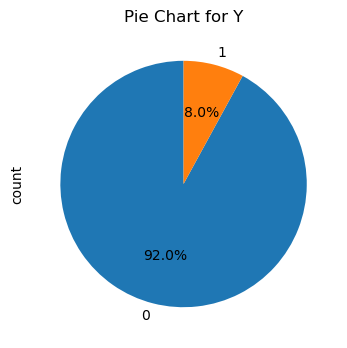

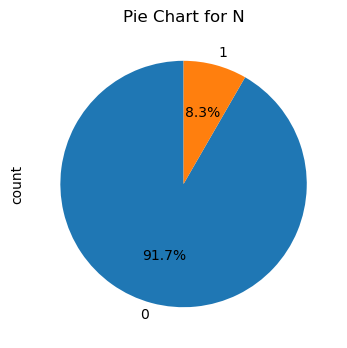

In [191]:
plot_univariate(app_df_cleaned3,"FLAG_OWN_REALTY","TARGET")

- 8.3% of people who own real estate were found to be defaulters
- 8.0% of people who don't own real estate were found to be defaulters

In [192]:
categorical_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE']

In [193]:
app_df_cleaned3.NAME_EDUCATION_TYPE.value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

# Visual analysis between Education Type and Target

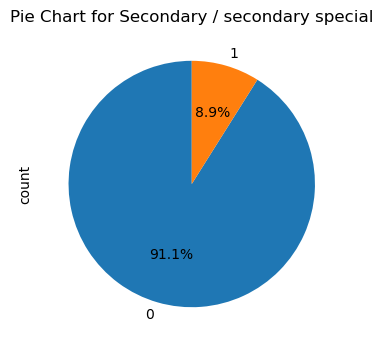

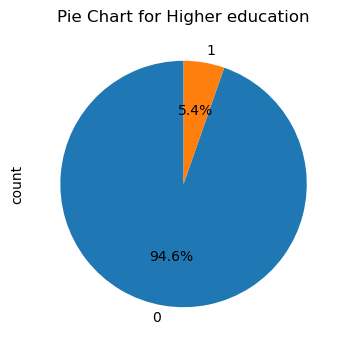

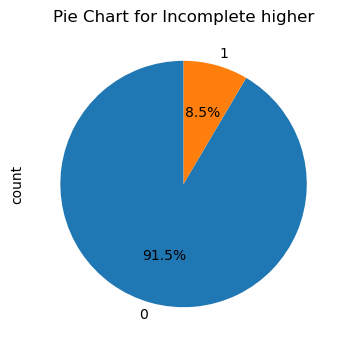

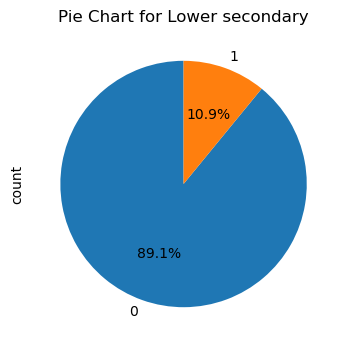

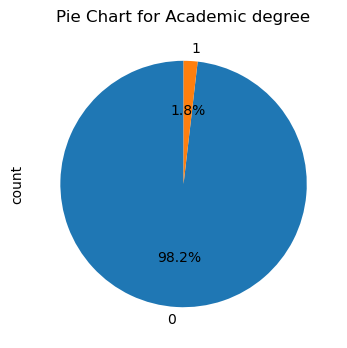

In [194]:
plot_univariate(app_df_cleaned3,"NAME_EDUCATION_TYPE","TARGET")

- People part of lower secondary education have the highest percentage of defaulters - 10.9%
- After comparing all of the charts we can say that at 1.8%, people with academic degrees have the lest tendency to be a defaulter

# Visual analysis between Income Type and Target

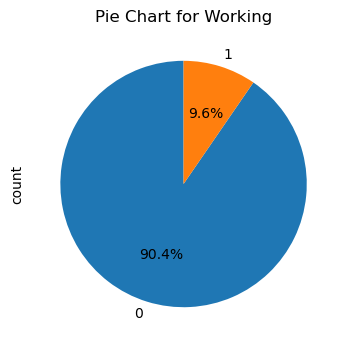

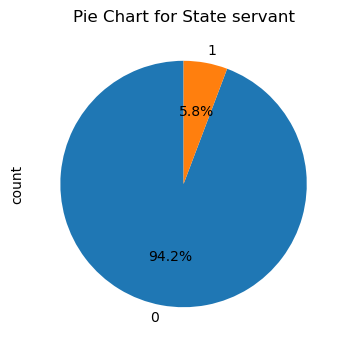

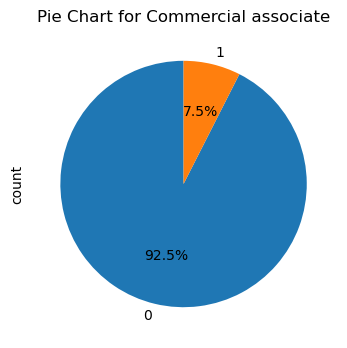

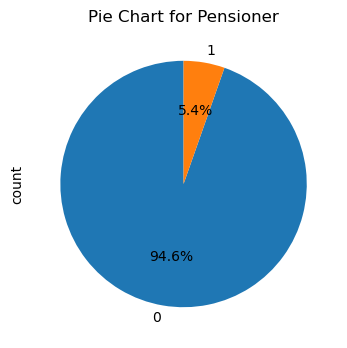

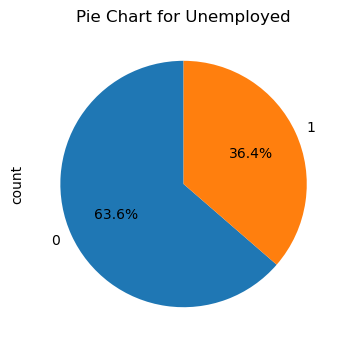

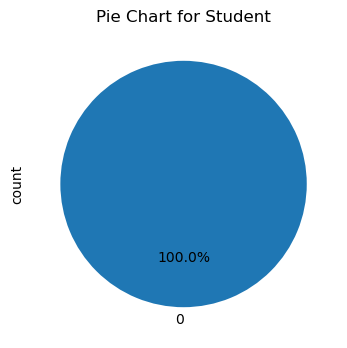

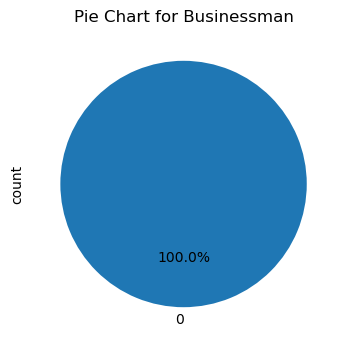

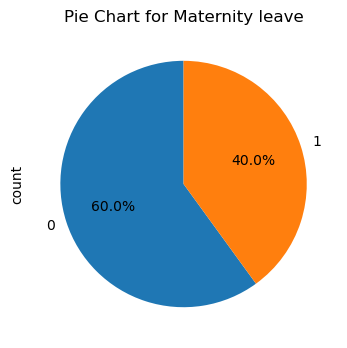

In [195]:
plot_univariate(app_df_cleaned3,"NAME_INCOME_TYPE","TARGET")

- Most of the loan applicants are working
- Top top defaulters are - applicants on maternity leave (40%) and unemployed applicants (36.4%)
- There are some defaulters that consitiute 10% of some of the categories like Pensioner, Commercial associate etc.
- Best categories to consider for loan will be Student and Businessmen as they have no record of anu default


# Bivariate Analysis of the dataset

In [196]:
# Function for bivariate analysis
    
def bivariate_analysis(col1,col2,data,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=col1,y=col2,data=data, hue=hue)     
    plt.xlabel(col1,fontsize = 15)    
    plt.ylabel(col2,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()
    

# BarPlot between Income Type Vs Income Range where hue is Target variable

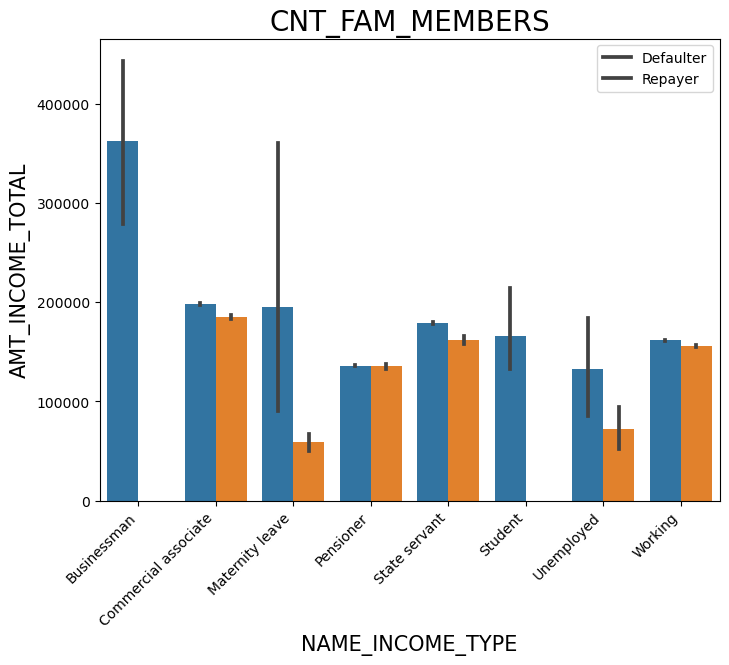

In [197]:
bivariate_analysis("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",app_df_cleaned3,"TARGET",(8,6),['Defaulter','Repayer'])

- In case of Businessman, the income seems start from beyond 2.5 Lakh.
- There is no range of income where this income category has seen defaulters, hence can be the best people to be considered for loans.

- In case of Commercial associate the defaulters income is seen to be below 2 lakh altogether. 
- Repayers have there income starting from 2 lakh and above.

- In case of Maternity leave, defaulter's income range is more than 0.4 Lakh and less than 0.6 Lakh. 
- Repayers in the same category have income in range starting from 0.9 Lakh to 2.9 Lakh.

- In case of Pensioner, repayers and defaulters are present in the same income range hence its difficult to infer if the defaulters are influenced by income at all.

- Another best category to consider for loans is of 'Student' as they have zero defaulters. 

- In case of unemployed, defaulters have their highest income touching 1 Lakh which may be in other forms and not exactly as income.
- Repayers in the same category lie in the better income range which is 0.8 lakh to 1.8 Lakh

# Bivariate Analysis between pending credit amount and Age of applicant

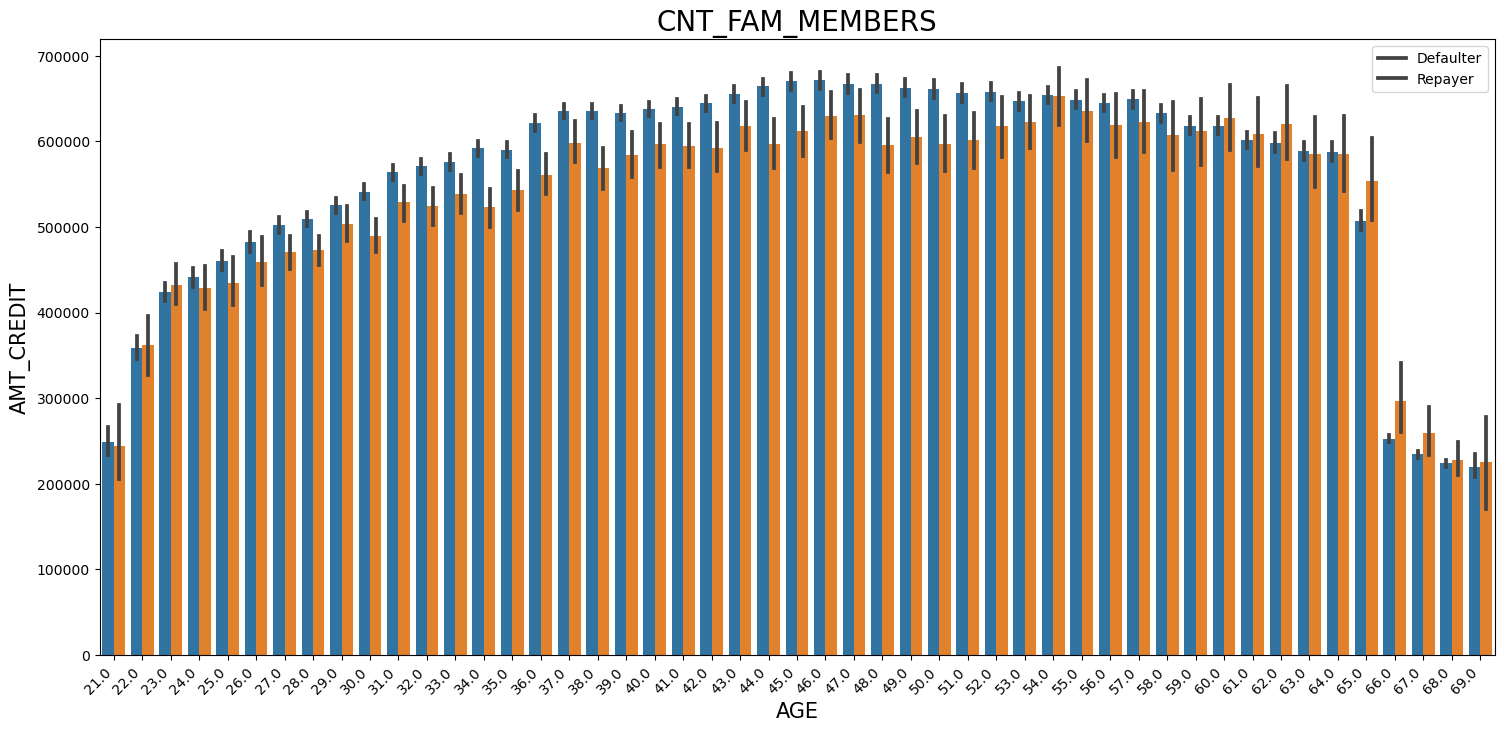

In [198]:
#To examine if age affects the amount of credit granted.
# Numerical vs Numerical
bivariate_analysis("AGE","AMT_CREDIT",app_df_cleaned3,"TARGET",(18,8),['Defaulter','Repayer'])

- We have the least amount of defaulters in the age range of 65+ years and a few in 21-22 years old range.
- The people having the highest amounta of pending credit amount are the ones with age rage of 43-49 years and 54-62 years.


# Categorical vs Numerical

# NAME_EDUCATION_TYPE & AMT_INCOME_TOTAL: To investigate if education level impacts income.

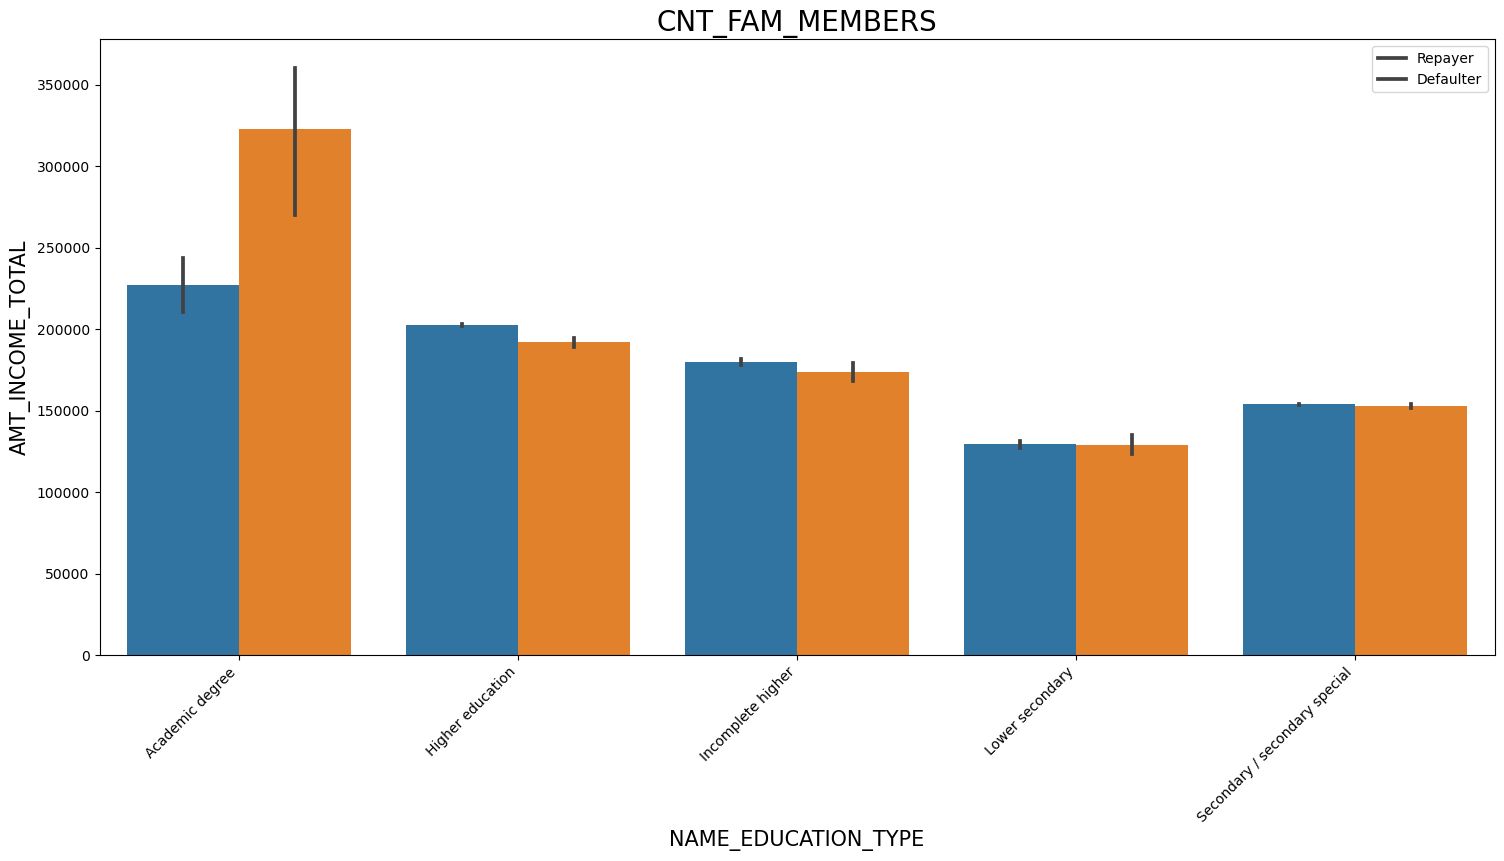

In [199]:
bivariate_analysis("NAME_EDUCATION_TYPE","AMT_INCOME_TOTAL",app_df_cleaned3,"TARGET",(18,8),['Repayer','Defaulter'])

- The highest number of defaulters are under the education type 'Academic degree' with total income amount of 2.7 Lakh to 3.6 Lakh
- The least amount of defaulters lie under the category of 'Lower Secondary' and with the income range of 1.3 Lakh to 1.4 Lakh

# NAME_FAMILY_STATUS & AMT_ANNUITY: To see how family status might influence the annuity amount.

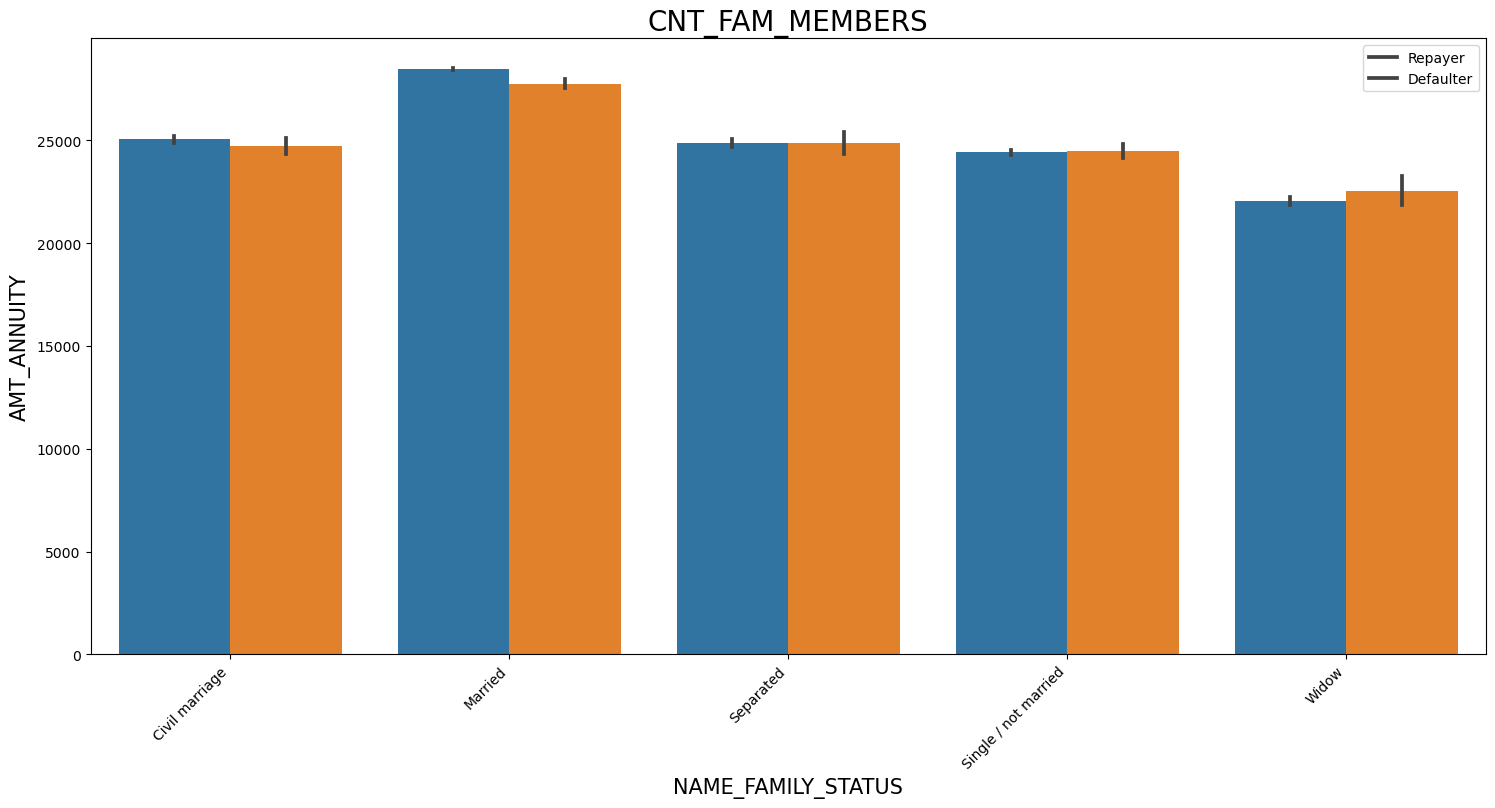

In [200]:
bivariate_analysis("NAME_FAMILY_STATUS","AMT_ANNUITY",app_df_cleaned3,"TARGET",(18,8),['Repayer','Defaulter'])

- After plotting the bivariate analysis for family status and annuity amount we can say that there is no specific pattern that may influence one to become a defaulter, hence family status is not one of the ground to qualify an applicant for a loan.

# Categorical Heatmap analysis and Correlation Heatmap analysis

In [201]:
def plot_categorical_heatmap(df, var1, var2):
    crosstab_matrix = pd.crosstab(df[var1], df[var2])
    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab_matrix, annot=True, fmt='d', cmap='viridis')
    plt.title(f'Heatmap of {var1} vs {var2}')
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()


In [202]:
def plot_correlation_heatmap(df, variables):
    corr_matrix = df[variables].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Categorical heatmap analysis b/w Contract Type and Applicant Gender

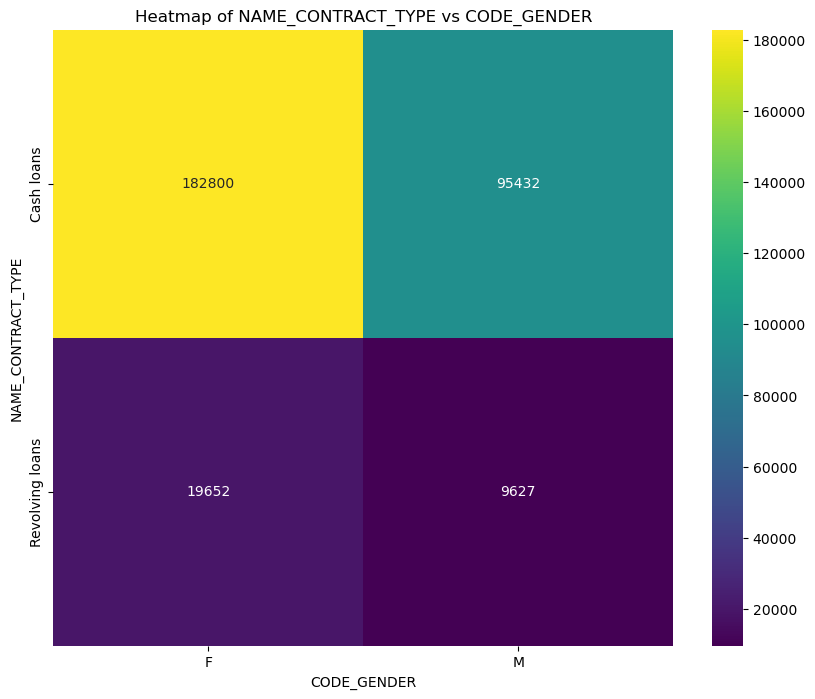

In [203]:
plot_categorical_heatmap(app_df_cleaned3, 'NAME_CONTRACT_TYPE', 'CODE_GENDER')

- Overall the most amount of Cash loans are the ones taken by females.
- Males with revolving loans have the least count in the entire data set.

# Categorical heatmap analysis b/w Contract type and Applicants who own car

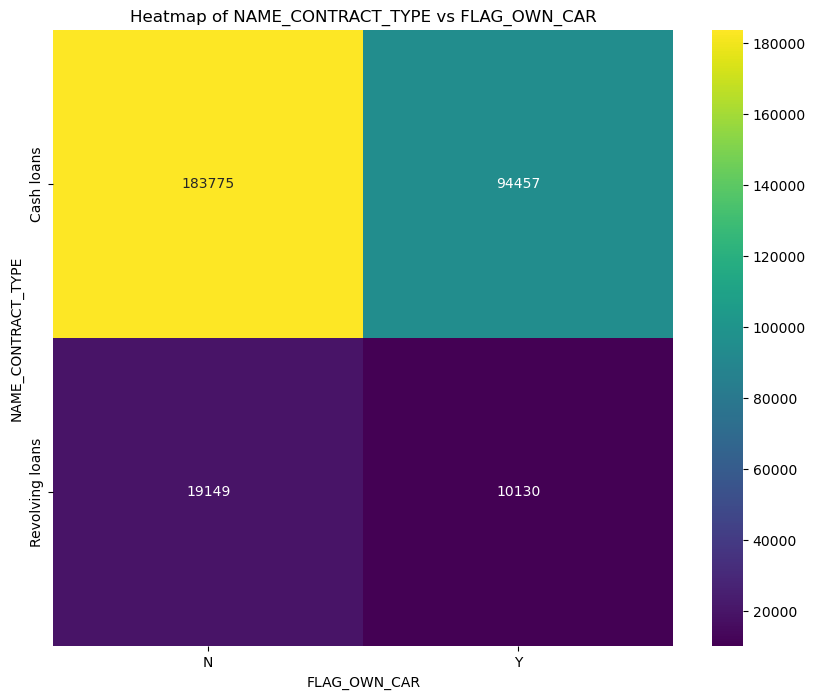

In [204]:
plot_categorical_heatmap(app_df_cleaned3, 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR')

- People who don't own cars are more inclined towards cash loans.
- People who own cars are equally distributes between cash loans and revolving loans.

# Categorical heatmap analysis b/w Contract type and Applicants who own properties

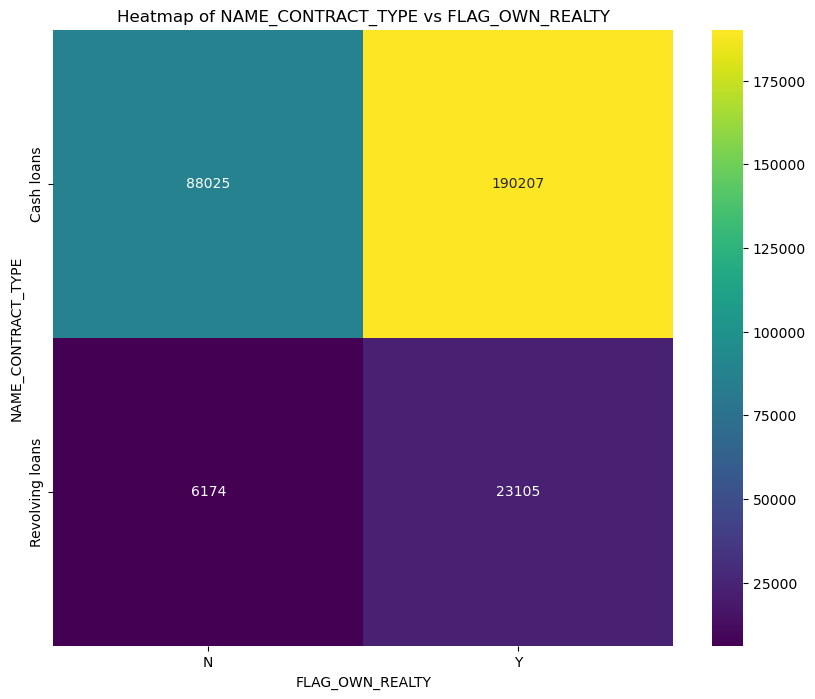

In [205]:
plot_categorical_heatmap(app_df_cleaned3, 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY')

- People who do not own any real estate and apply for loans are comparatively less in number.
- In those few people who do apply, more incline towardscash loans than revolving loans.
- People who own real estate tend to appli for loans a lot more. A very large number of them prefer cash loans over revolving loans.

# Categorical heatmap analysis b/w level of education and family status of applicant

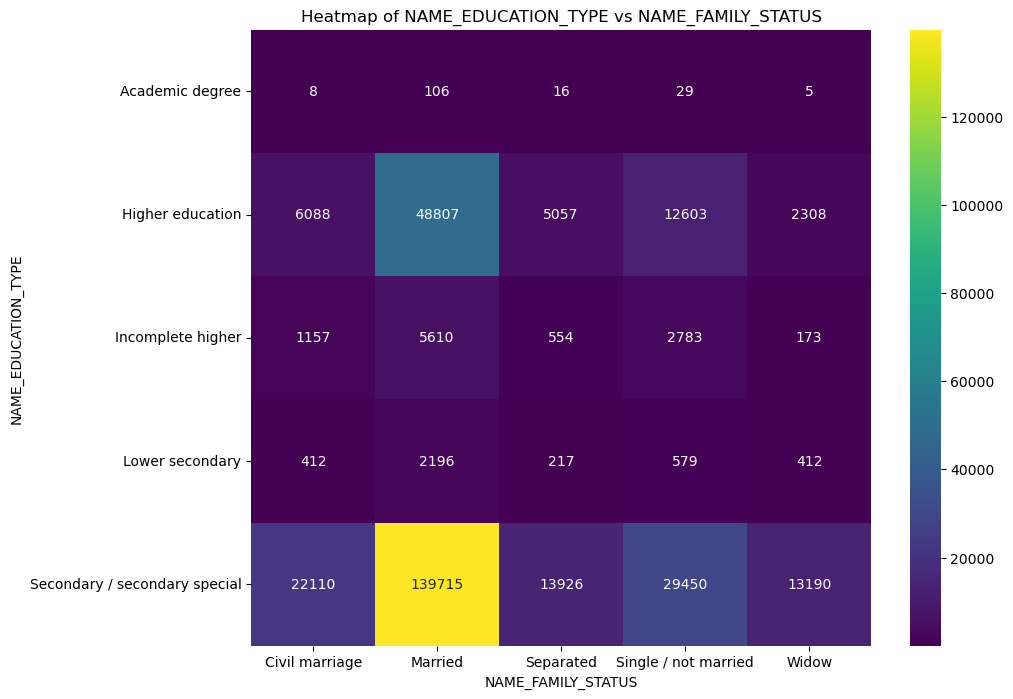

In [206]:
plot_categorical_heatmap(app_df_cleaned3, 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS')

- Most of the applicants come from married background and have secondary level of education.
- The second category of high applicants are married and attained higher education.
- Least amount of applicants are the ones who are widowed and have an academic degree & people with civil marriage and holding an academic degree.

# Categorical heatmap analysis b/w Organisation type and income type

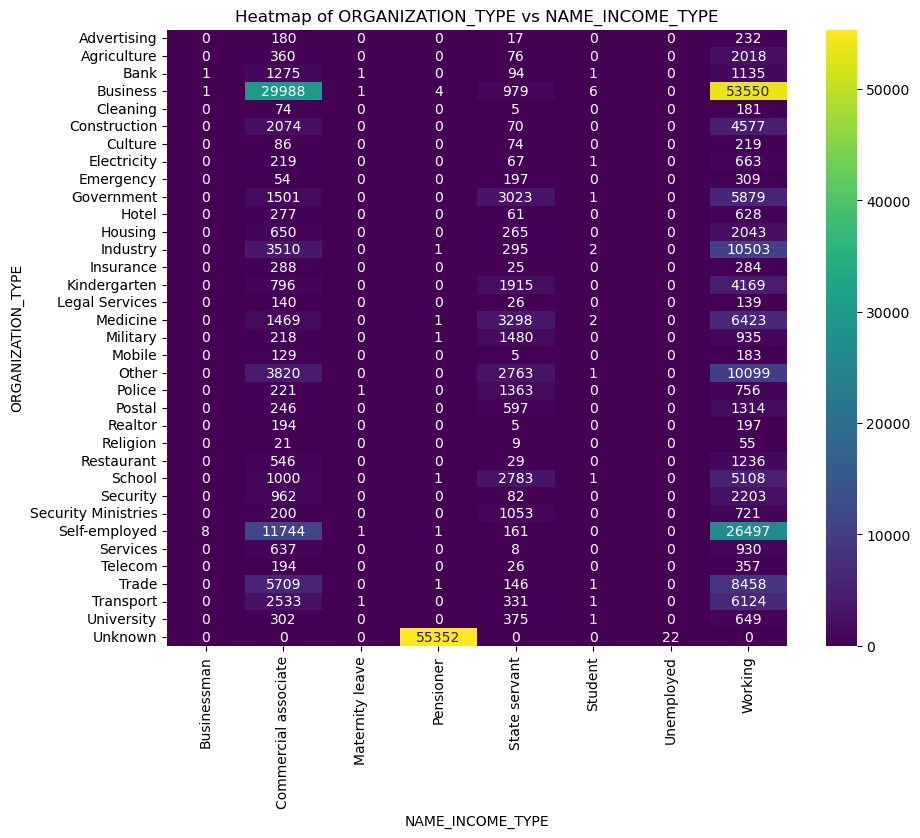

In [207]:
plot_categorical_heatmap(app_df_cleaned3, 'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE')

- Highest number of loans are taken up by pensioners with no specififc organisation type specified.
- Second highest are working businessmen who take up good amounts of loan to support their work needs.
- Third and fourth highest are Commercial associate businessmen/businesswomen and self-employed working professionals.

# Figuring out correlations

In [208]:
# Creating list of columns that can potentially have correlation
num_vars_for_heatmap = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'CNT_FAM_MEMBERS',
    'AGE'
]

# Correlation heatmap analysis using num_vars_for_heatmap

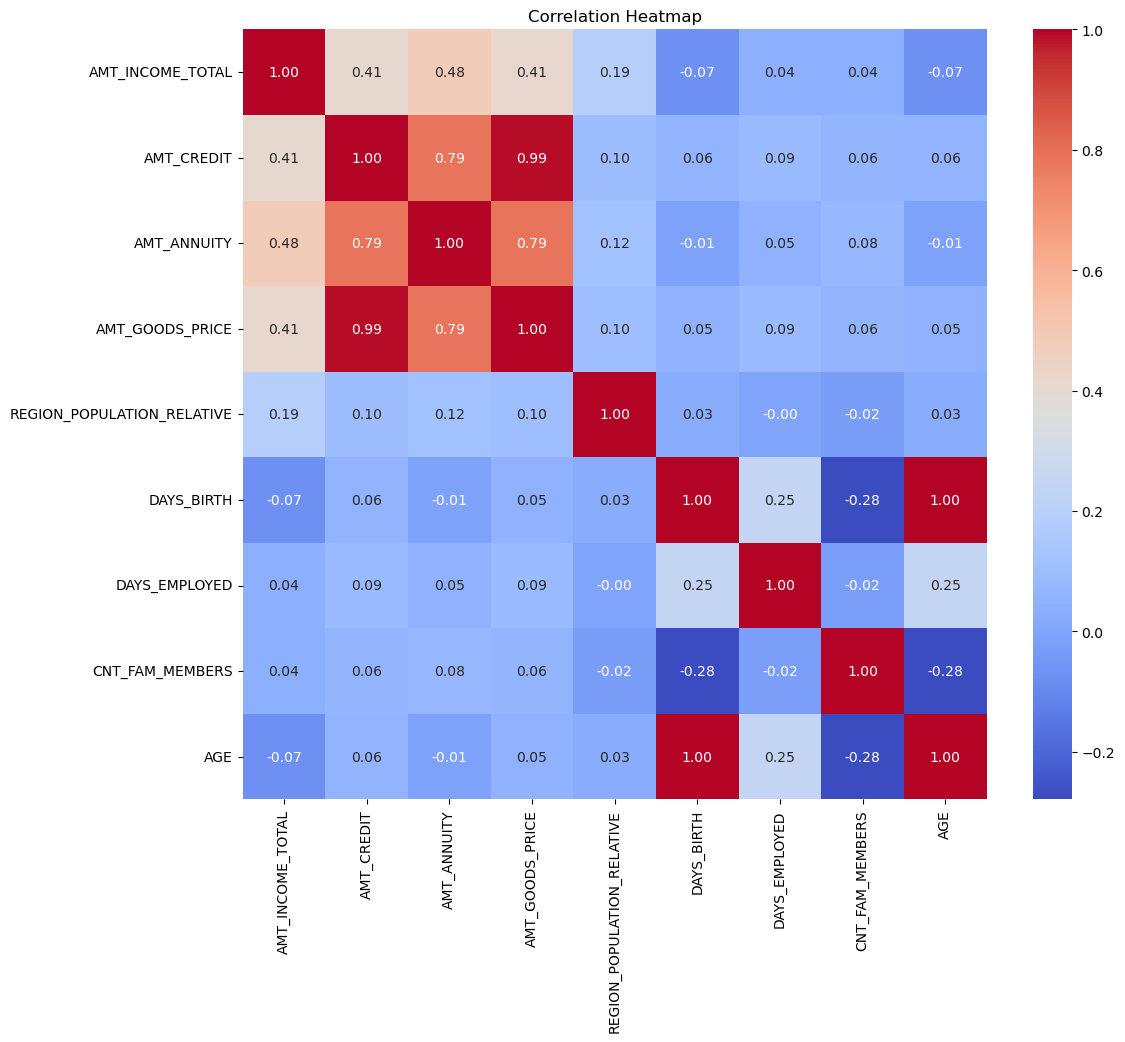

In [209]:
plot_correlation_heatmap(app_df_cleaned3, num_vars_for_heatmap)

Top correlations as depicted by the above heatmap:
1) Pending credit amount & Goods Price
2) Pending credit amount & annuity amount
3) Annuity amount & goods price
4) Total income & Annuity amount
5) Pending credit amount & Total income
6) Total income & Goods price

In [210]:
app_df_cleaned3.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CRE

In [211]:
len(app_df_cleaned3.columns)

45

# Creating separate dataframe for defaulters

In [212]:
all_defaulters_df = app_df_cleaned3.loc[app_df_cleaned3['TARGET']==1, app_df_cleaned3.columns]
all_defaulters_df.drop(columns='TARGET', inplace = True)
all_defaulters_df

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002         Cash loans           M            N   
26          100031         Cash loans           F            N   
40          100047         Cash loans           M            N   
42          100049         Cash loans           F            N   
81          100096         Cash loans           F            N   
...            ...                ...         ...          ...   
307448      456186         Cash loans           M            N   
307475      456215         Cash loans           F            N   
307481      456225         Cash loans           M            N   
307489      456233         Cash loans           F            N   
307509      456254         Cash loans           F            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y            0          202500.0    406597.5   
26                   Y            0          112500.0    979992.0   
40                   Y            0          202500.0   1193580.0   
42                   N            0          135000.0    288873.0   
81                   Y            0           81000.0    252000.0   
...                ...          ...               ...         ...   
307448               N            1          207000.0    450000.0   
307475               N            1          144000.0   1303200.0   
307481               Y            0          225000.0    297000.0   
307489               Y            0          225000.0    521280.0   
307509               Y            0          171000.0    370107.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... OBS_60_CNT_SOCIAL_CIRCLE  \
0           24700.5         351000.0  ...                        2   
26          27076.5         702000.0  ...                       10   
40          35028.0         855000.0  ...                        0   
42          16258.5         238500.0  ...                        1   
81          14593.5         252000.0  ...                        1   
...             ...              ...  ...                      ...   
307448      32746.5         450000.0  ...                        0   
307475      46809.0        1125000.0  ...                        0   
307481      19975.5         297000.0  ...                        0   
307489      23089.5         450000.0  ...                        1   
307509      20205.0         319500.0  ...                        0   

       DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0                             2                 1134.0   
26                            0                  161.0   
40                            0                 1075.0   
42                            0                 1480.0   
81                            1                    0.0   
...                         ...                    ...   
307448                        0                  324.0   
307475                        0                 1492.0   
307481                        0                 2941.0   
307489                        0                  307.0   
307509                        0                  322.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                               0                          0   
26                              0                          0   
40                              0                          0   
42                              0                          0   
81                              0                          0   
...                           ...                        ...   
307448                          0                          0   
307475                          0                          0   
307481                          0                          0   
307489                          0                          0   
307509                          0                          0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0             

# Creating separate dataframe for repayers

In [213]:
all_repayers_df = app_df_cleaned3.loc[app_df_cleaned3['TARGET']==0, app_df_cleaned3.columns]
all_repayers_df.drop(columns='TARGET', inplace = True)
all_repayers_df

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1           100003         Cash loans           F            N   
2           100004    Revolving loans           M            Y   
3           100006         Cash loans           F            N   
4           100007         Cash loans           M            N   
5           100008         Cash loans           M            N   
...            ...                ...         ...          ...   
307505      456249         Cash loans           F            N   
307506      456251         Cash loans           M            N   
307507      456252         Cash loans           F            N   
307508      456253         Cash loans           F            N   
307510      456255         Cash loans           F            N   

       FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1                    N            0          270000.0   1293502.5   
2                    Y            0           67500.0    135000.0   
3                    Y            0          135000.0    312682.5   
4                    Y            0          121500.0    513000.0   
5                    Y            0           99000.0    490495.5   
...                ...          ...               ...         ...   
307505               Y            0          112500.0    225000.0   
307506               N            0          157500.0    254700.0   
307507               Y            0           72000.0    269550.0   
307508               Y            0          153000.0    677664.0   
307510               N            0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  ... OBS_60_CNT_SOCIAL_CIRCLE  \
1           35698.5        1129500.0  ...                        1   
2            6750.0         135000.0  ...                        0   
3           29686.5         297000.0  ...                        2   
4           21865.5         513000.0  ...                        0   
5           27517.5         454500.0  ...                        0   
...             ...              ...  ...                      ...   
307505      22050.0         225000.0  ...                        0   
307506      27558.0         225000.0  ...                        0   
307507      12001.5         225000.0  ...                        0   
307508      29979.0         585000.0  ...                        6   
307510      49117.5         675000.0  ...                        0   

       DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
1                             0                  828.0   
2                             0                  815.0   
3                             0                  617.0   
4                             0                 1106.0   
5                             0                 2536.0   
...                         ...                    ...   
307505                        0                    0.0   
307506                        0                  273.0   
307507                        0                    0.0   
307508                        0                 1909.0   
307510                        0                  787.0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
5                               0                          0   
...                           ...                        ...   
307505                          0                          0   
307506                          0                          0   
307507                          0                          0   
307508                          1                          0   
307510                          0                          0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1             

In [214]:
def plot_heatmap(dataframe, figsize=(10, 8), cmap='viridis', annot=True):
    numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = dataframe[numerical_columns].corr()
    plt.figure(figsize=figsize)
    hm = sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=".2f", linewidths=.5)
    hm.set_xticklabels(hm.get_xticklabels(), fontsize=18)
    hm.set_yticklabels(hm.get_yticklabels(), fontsize=18)
    plt.title('Correlation Heatmap', fontsize = 24)
    plt.show()

# Plotting heatmap for linear correlation analysis on defaulters

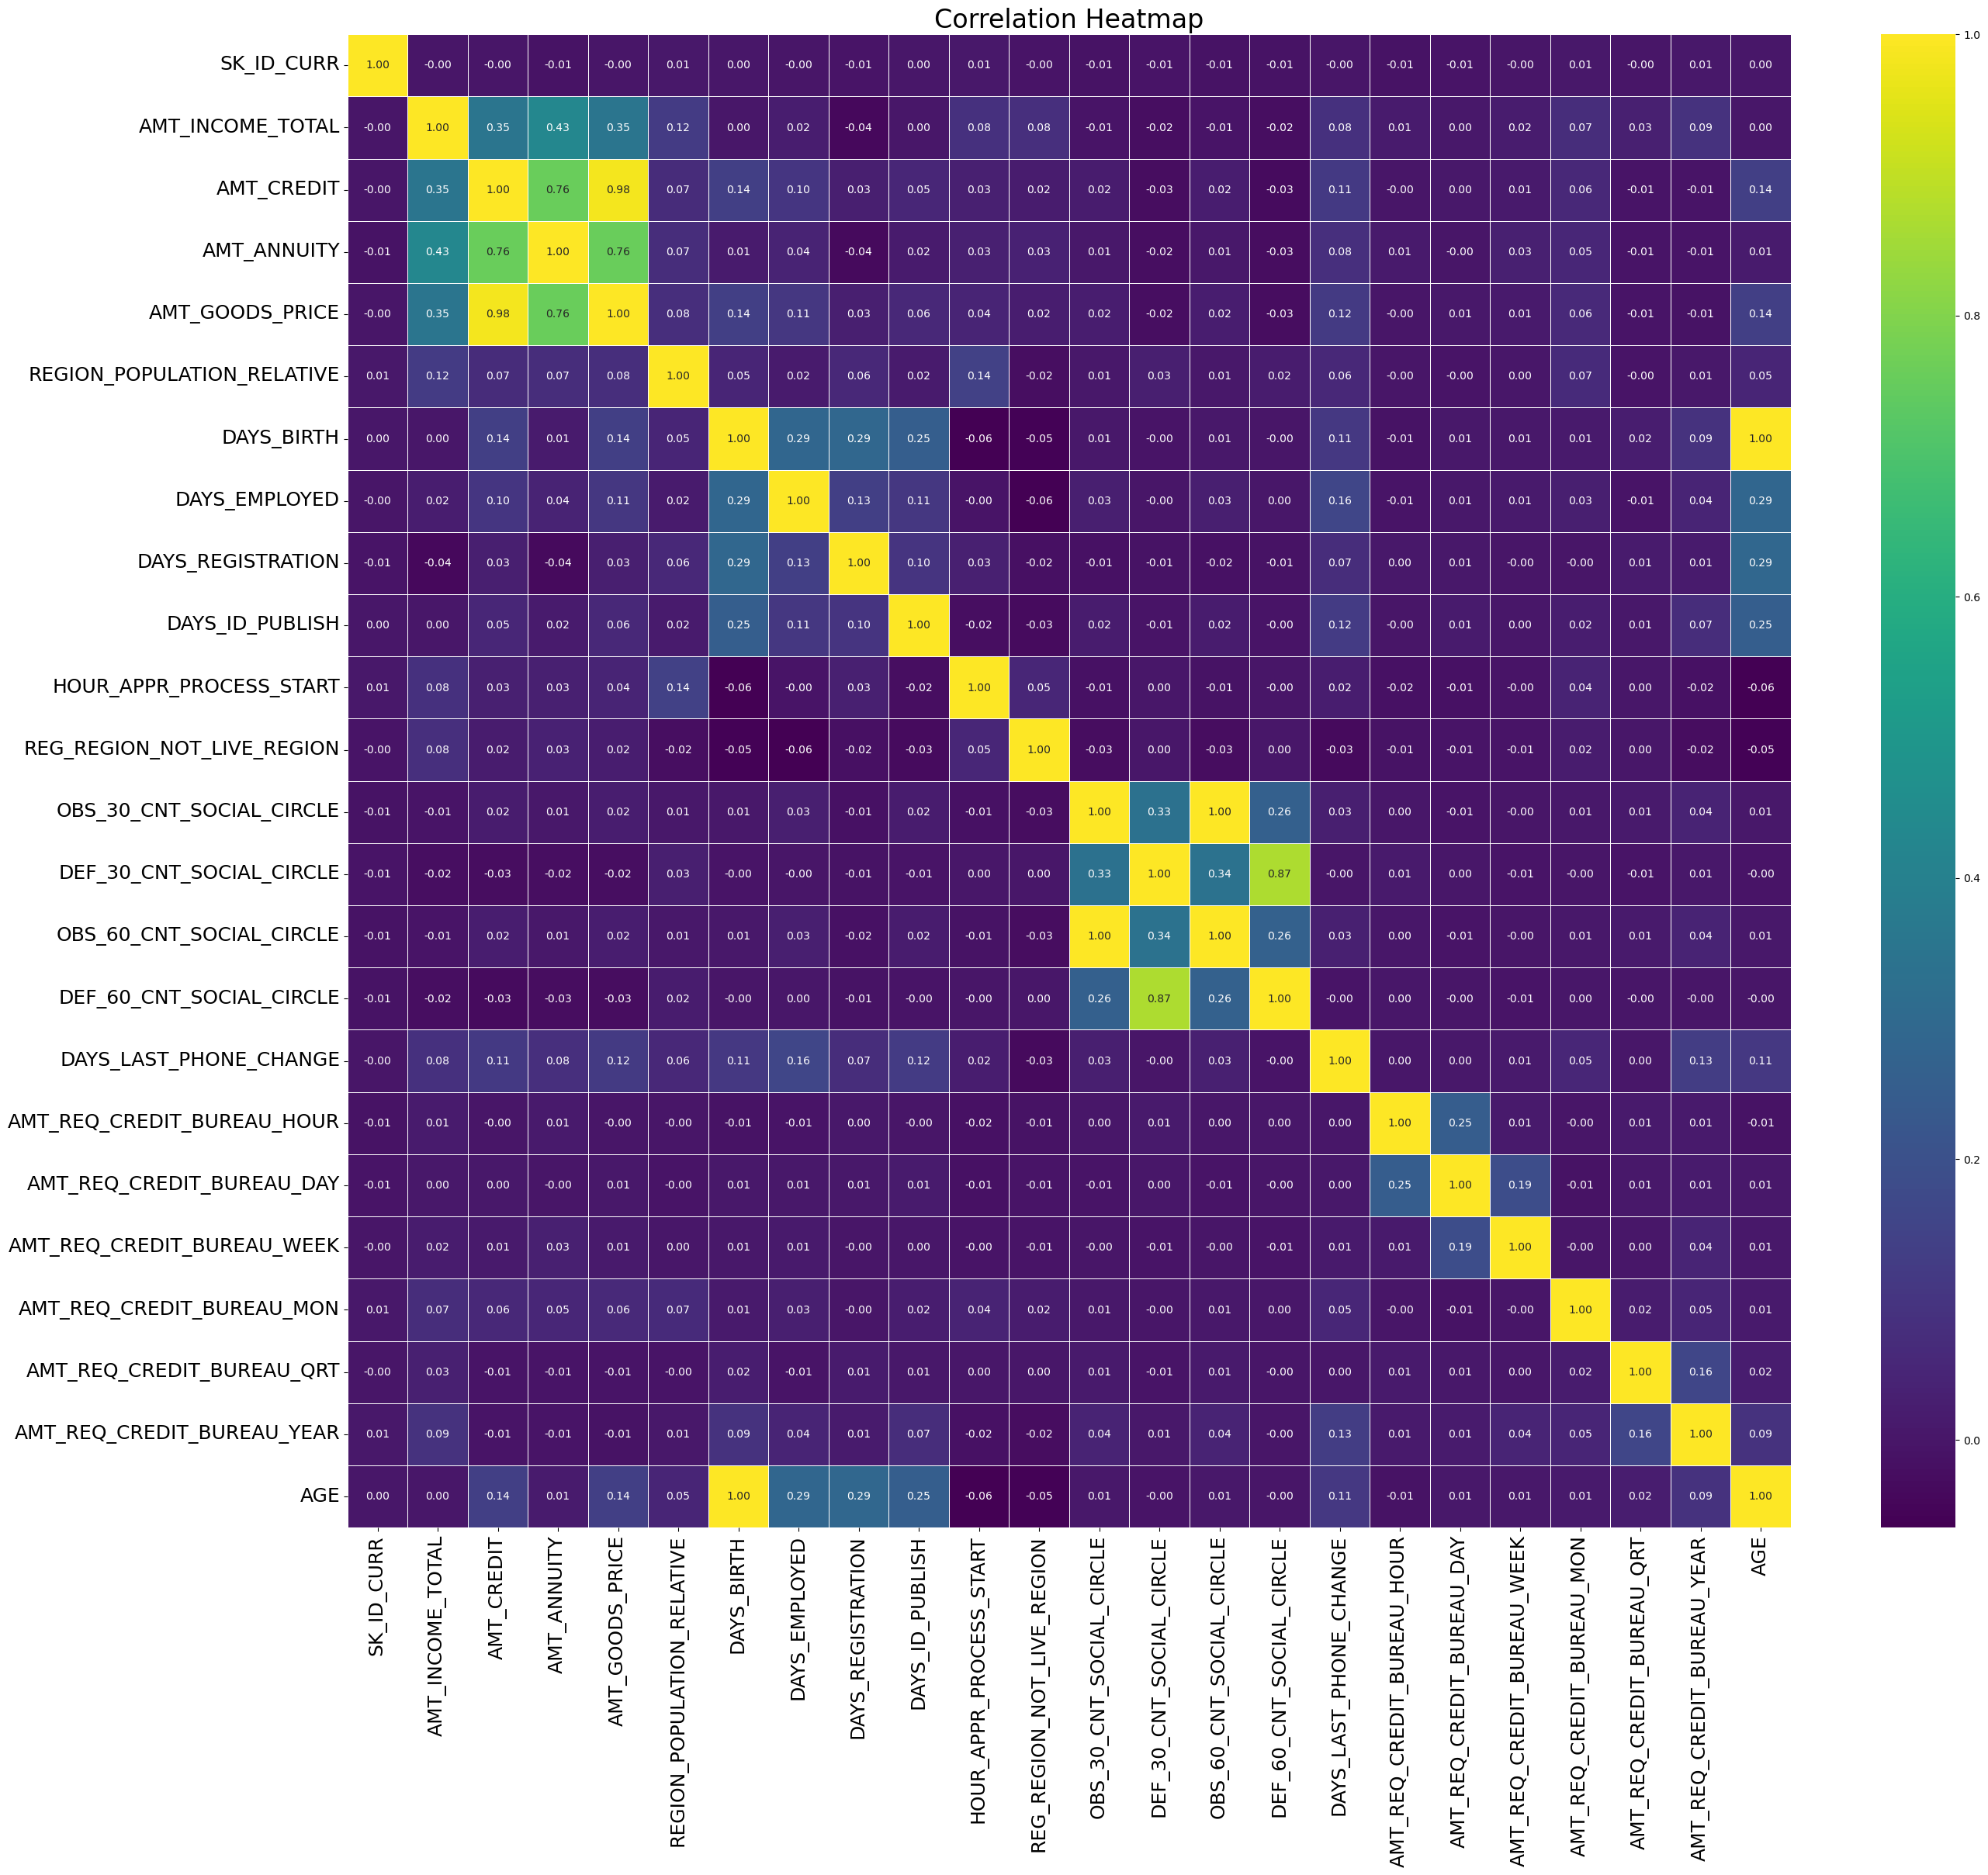

In [215]:
plot_heatmap(all_defaulters_df, figsize=(30,25))

Correlation pairs for defaulters dataframe:
1) Pending credit amount & Goods amount
2) 30 days past due clients & 60 days past due clients
3) 30 days past due defaulters & 60 days past due defaulters
4) Pending credit amount & Annuity amount
5) Annuity amount & goods price

# Plotting heatmap for linear correlation analysis on repayers

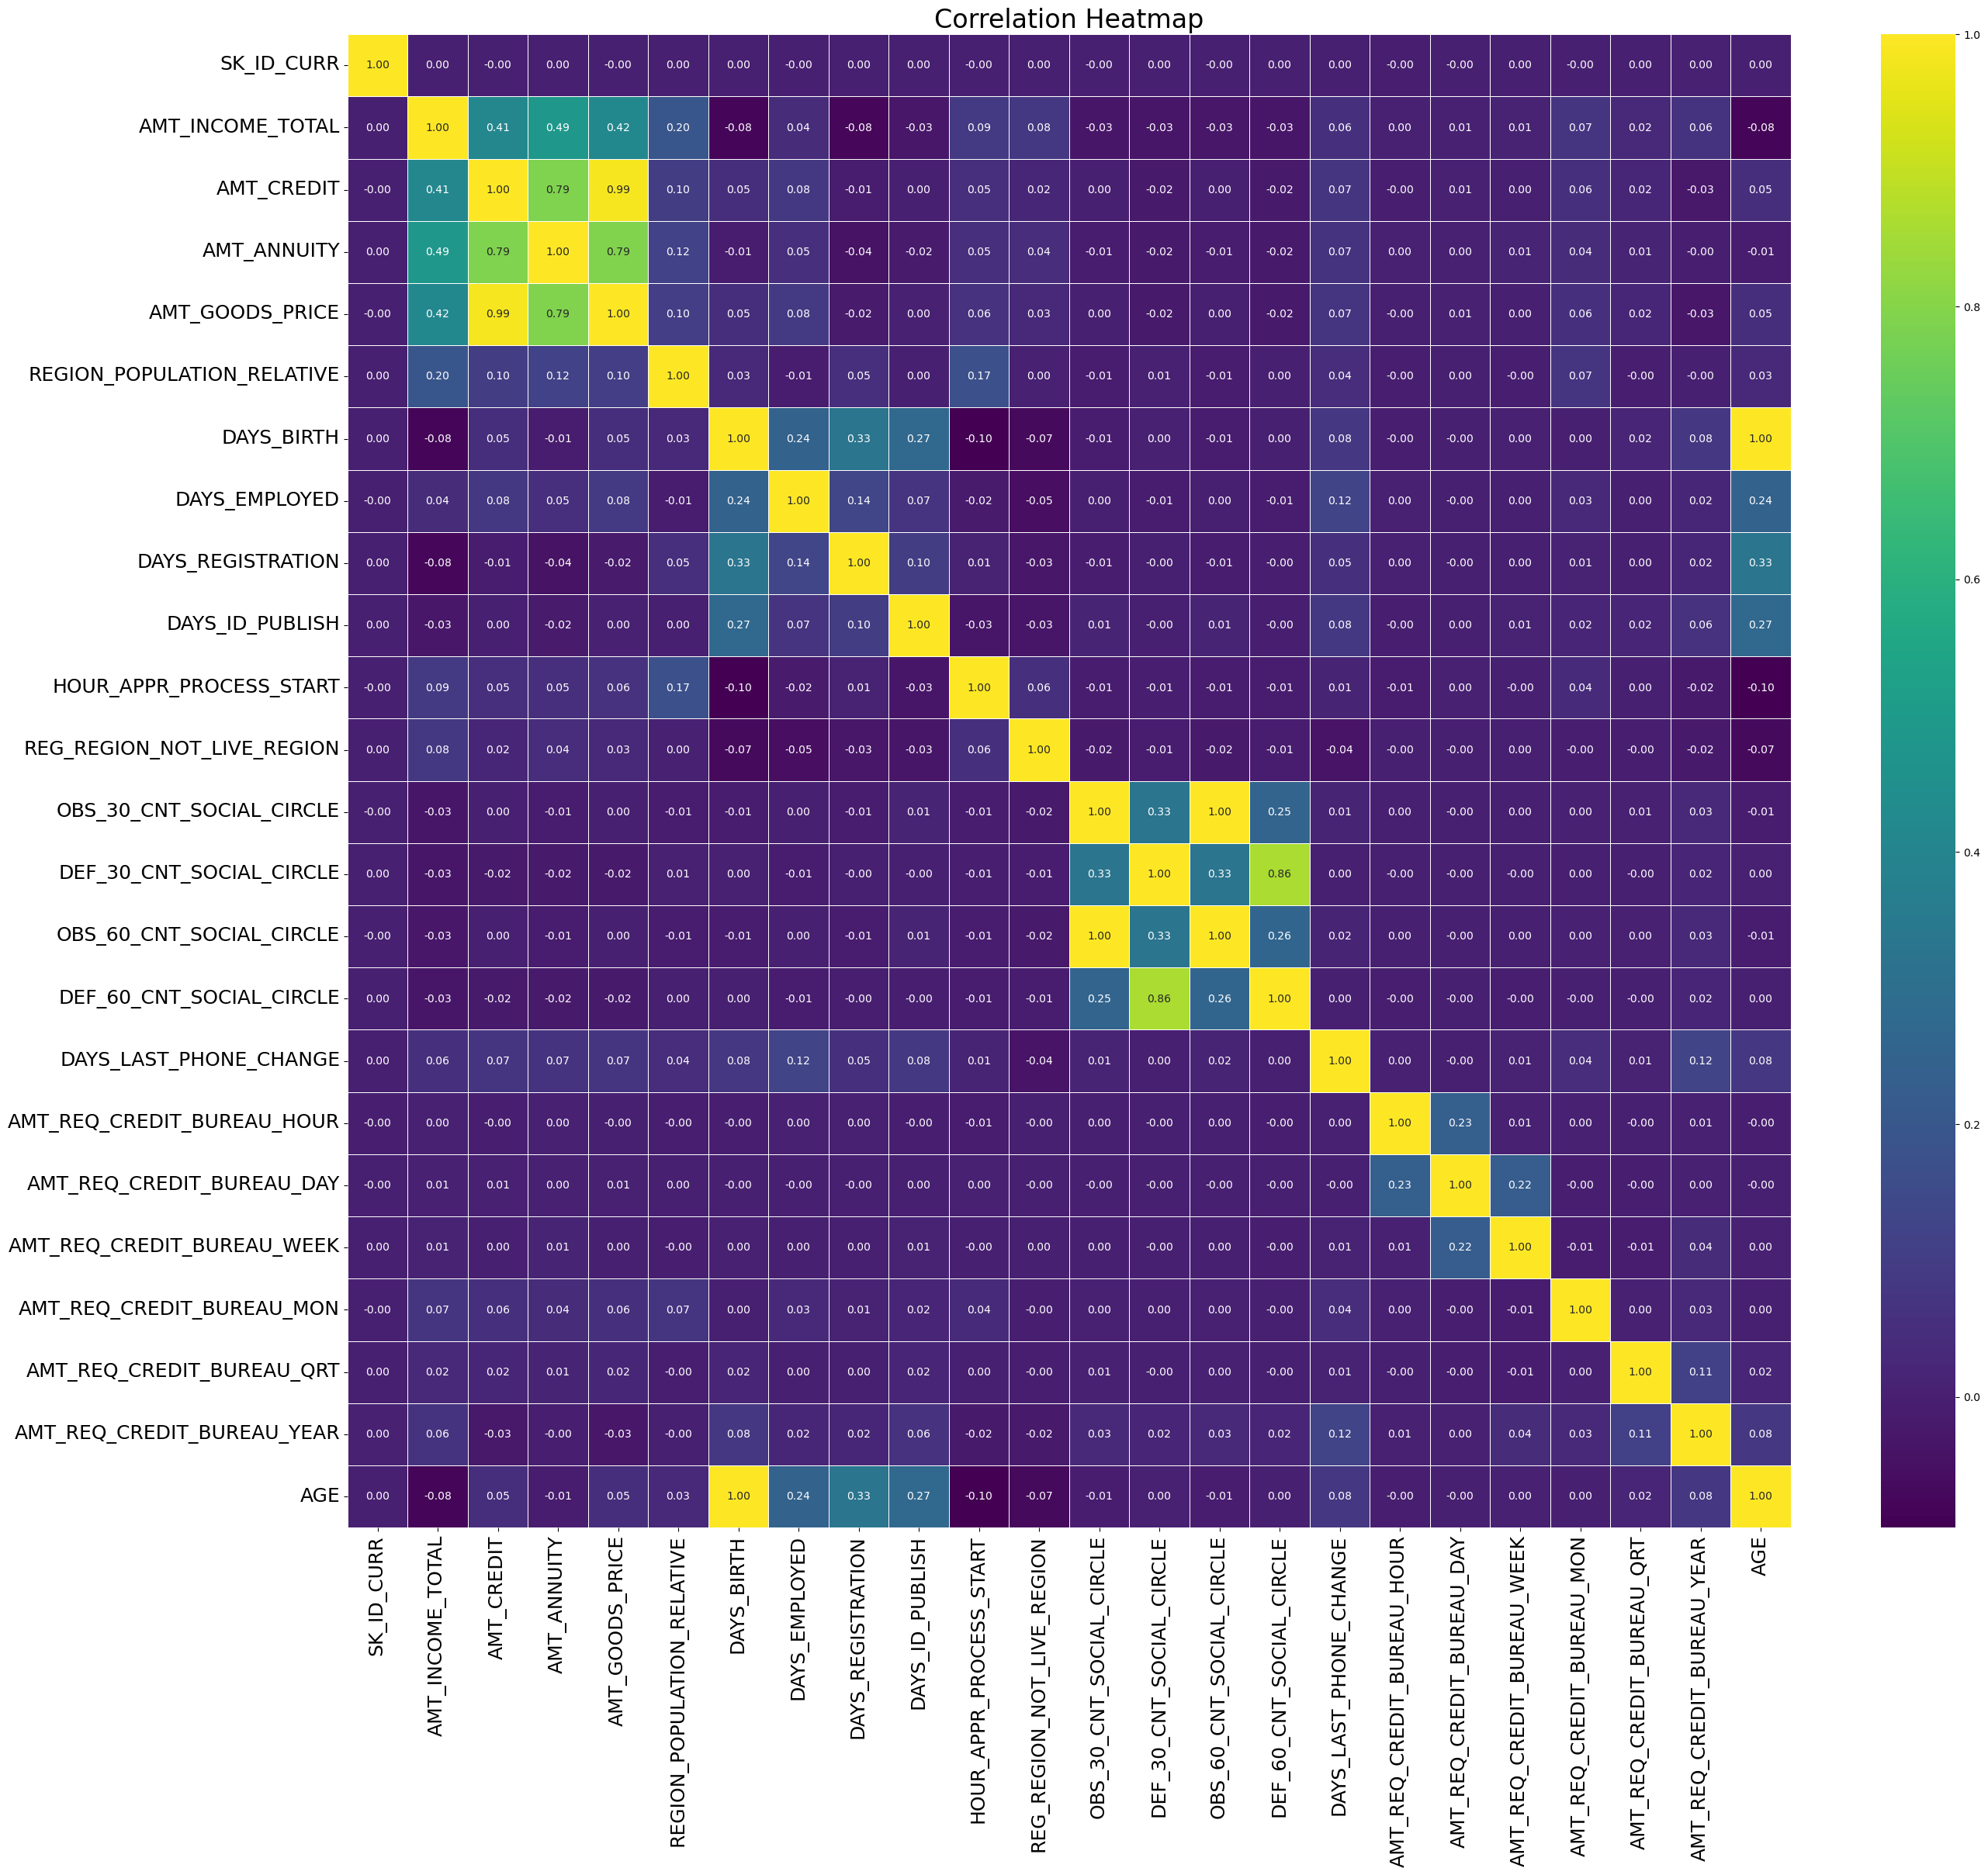

In [216]:
plot_heatmap(all_repayers_df, figsize=(30,25))

Correlation pairs for repayers dataframe:
1) Pending credit amount & gooda amount
2) 30 days past due clients & 60 days past due clients
3) 30 days past due defaulters & 60 days past due defaulters
4) Pending credit amount & Annuity amount
5) Annuity amount & goods price

# Distribution comparison analysis b/w defaulters and repayers using numerical columns

In [217]:
num_col_for_analysis = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
num_analysis_df = app_df_cleaned3[num_col_for_analysis]
num_analysis_df

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE
0               202500.0    406597.5      24700.5         351000.0
1               270000.0   1293502.5      35698.5        1129500.0
2                67500.0    135000.0       6750.0         135000.0
3               135000.0    312682.5      29686.5         297000.0
4               121500.0    513000.0      21865.5         513000.0
...                  ...         ...          ...              ...
307506          157500.0    254700.0      27558.0         225000.0
307507           72000.0    269550.0      12001.5         225000.0
307508          153000.0    677664.0      29979.0         585000.0
307509          171000.0    370107.0      20205.0         319500.0
307510          157500.0    675000.0      49117.5         675000.0

[307511 rows x 4 columns]

In [218]:
# Writing method for distribution comparison analysis
def plot_distribution_comparison(def_df, rep_df, col, figsize=(16, 12)):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    for idx, column in enumerate(col):
        row_index = idx // 2
        col_index = idx % 2
        ax = axes[row_index, col_index]

        sns.kdeplot(def_df[column], fill=True, label="Defaulter", ax=ax, common_norm=False)
        sns.kdeplot(rep_df[column], fill=True, label="Repayer", ax=ax, common_norm=False)

        ax.set_title(column, fontdict={'fontsize': 18, 'fontweight': 8})
        ax.legend()

    plt.tight_layout()
    plt.show()

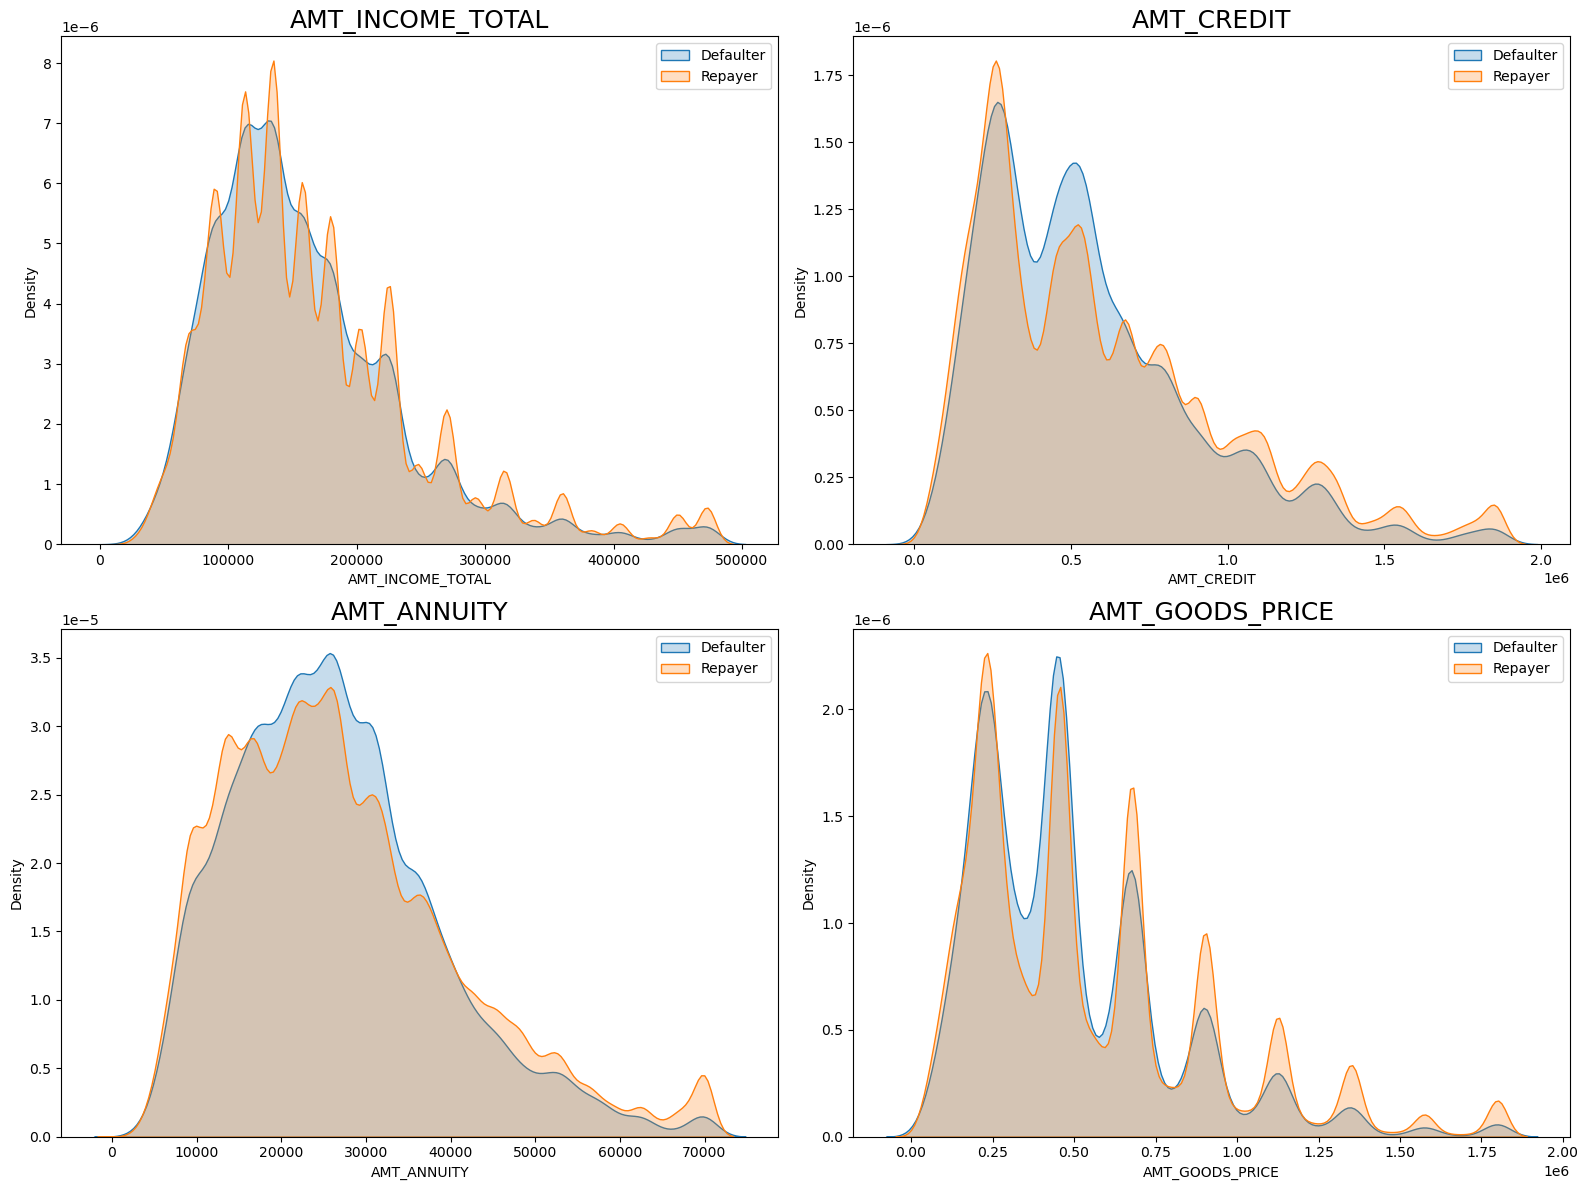

In [219]:
plot_distribution_comparison(all_defaulters_df,all_repayers_df,num_col_for_analysis)

Density plot for total income amount between defaulters and repayers:
- People with higher income were able to repay better than people with lower income

Density plot for total credit amount between defaulters and repayers:
- People having pending credit upto 5 Lakhs turned out to be more of defaulters than repayers
- People who had less pending credit where able to repay the loan taken

Density plot for annuity amount between defaulters and repayers:
- People having annuity between 1.5 Lakh to 3.3 Lakh had higher number of defaulters.

Density plot for total goods price between defaulters and repayers:
- The only time where defaulters took over repayers in total was when the goods proce amounted around 5 Lakh.
- As the goods price tend to increase, the defaulters tend to decrease.

# Checking bivariate relationship between Goods price and pending credit amount

<Figure size 2000x2000 with 0 Axes>

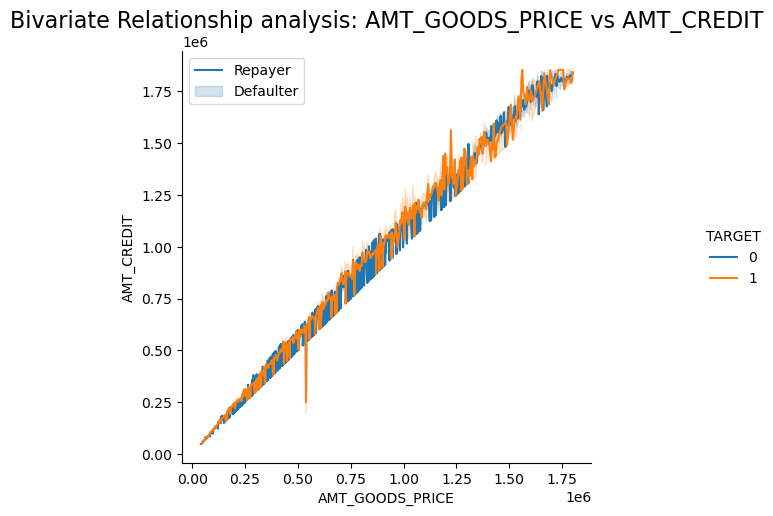

In [220]:
plt.figure(figsize=[20, 20])
sns.relplot(x='AMT_GOODS_PRICE', y='AMT_CREDIT', data=app_df_cleaned3, hue='TARGET', kind='line')
plt.legend(labels=['Repayer', 'Defaulter'])
plt.title('Bivariate Relationship analysis: AMT_GOODS_PRICE vs AMT_CREDIT', fontsize= 16)
plt.show()

As amount is on the rise (greater than 7.5 Lakh) we can see defaulters overpowering repayers.

# Merged dataframe analysis

 We will use the sk_id to map the application dataset with the previous application dataset

In [221]:
merged_application_df = pd.merge(app_df_cleaned3, prev_df, how='inner', on='SK_ID_CURR')
merged_application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0               Y            0          202500.0      406597.5        24700.5   
1               N            0          270000.0     1293502.5        35698.5   
2               N            0          270000.0     1293502.5        35698.5   
3               N            0          270000.0     1293502.5        35698.5   
4               Y            0           67500.0      135000.0         6750.0   

   ...  SELLERPLACE_AREA CNT_PAYMENT NAME_YIELD_GROUP  \
0  ...               500        24.0       low_normal   
1  ...                 1        12.0       low_normal   
2  ...              1400         6.0           middle   
3  ...               200        12.0           middle   
4  ...                30         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0      POS other with interest             365243             565   
1             Cash X-Sell: low             365243             716   
2   POS industry with interest             365243             797   
3  POS household with interest             365243            2310   
4  POS mobile without interest             365243             784   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                        125             25                17   
1                       -386            536               527   
2                       -647            647               639   
3                      -1980           1980              1976   
4                       -694            724               714   

   NFLAG_INSURED_ON_APPROVAL  
0                          0  
1                          1  
2                          0  
3                          1  
4                          0  

[5 rows x 70 columns]

In [222]:
merged_application_df.shape

(1413701, 70)

## Creating seperate dataframes of repayers and defaulters from the new merged dataset

In [223]:
all_rep_merged_df = merged_application_df[merged_application_df['TARGET']==0]
all_rep_merged_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
5            100006       0           Cash loans           F            N   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
1                     N            0          270000.0     1293502.5   
2                     N            0          270000.0     1293502.5   
3                     N            0          270000.0     1293502.5   
4                     Y            0           67500.0      135000.0   
5                     Y            0          135000.0      312682.5   
...                 ...          ...               ...           ...   
1413696               N            0          157500.0      675000.0   
1413697               N            0          157500.0      675000.0   
1413698               N            0          157500.0      675000.0   
1413699               N            0          157500.0      675000.0   
1413700               N            0          157500.0      675000.0   

         AMT_ANNUITY_x  ...  SELLERPLACE_AREA CNT_PAYMENT NAME_YIELD_GROUP  \
1              35698.5  ...                 1        12.0       low_normal   
2              35698.5  ...              1400         6.0           middle   
3              35698.5  ...               200        12.0           middle   
4               6750.0  ...                30         4.0           middle   
5              29686.5  ...                 1        48.0       low_normal   
...                ...  ...               ...         ...              ...   
1413696        49117.5  ...                 1        24.0           middle   
1413697        49117.5  ...                20         0.0          Unknown   
1413698        49117.5  ...                 1        60.0       low_normal   
1413699        49117.5  ...                 6        36.0       low_normal   
1413700        49117.5  ...                20         6.0             high   

                 PRODUCT_COMBINATION DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
1                   Cash X-Sell: low             365243             716   
2         POS industry with interest             365243             797   
3        POS household with interest             365243            2310   
4        POS mobile without interest             365243             784   
5                   Cash X-Sell: low             365243             151   
...                              ...                ...             ...   
1413696          Cash X-Sell: middle             365243             618   
1413697                  Card Street                  0               0   
1413698             Cash Street: low                  0               0   
1413699             Cash X-Sell: low             365243             756   
1413700     POS mobile with interest             365243             469   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
1                             -386            536               527   
2                             -647            647               639   
3                            -1980           1980              1976   
4                             -694            724               714   
5                         

In [224]:
all_def_merged_df = merged_application_df[merged_application_df['TARGET']==1]
all_def_merged_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
161          100047       1           Cash loans           M            N   
162          100047       1           Cash loans           M            N   
163          100047       1           Cash loans           M            N   
164          100047       1           Cash loans           M            N   
...             ...     ...                  ...         ...          ...   
1413559      456225       1           Cash loans           M            N   
1413601      456233       1           Cash loans           F            N   
1413602      456233       1           Cash loans           F            N   
1413691      456254       1           Cash loans           F            N   
1413692      456254       1           Cash loans           F            N   

        FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y            0          202500.0      406597.5   
161                   Y            0          202500.0     1193580.0   
162                   Y            0          202500.0     1193580.0   
163                   Y            0          202500.0     1193580.0   
164                   Y            0          202500.0     1193580.0   
...                 ...          ...               ...           ...   
1413559               Y            0          225000.0      297000.0   
1413601               Y            0          225000.0      521280.0   
1413602               Y            0          225000.0      521280.0   
1413691               Y            0          171000.0      370107.0   
1413692               Y            0          171000.0      370107.0   

         AMT_ANNUITY_x  ...  SELLERPLACE_AREA CNT_PAYMENT NAME_YIELD_GROUP  \
0              24700.5  ...               500        24.0       low_normal   
161            35028.0  ...                 1         0.0          Unknown   
162            35028.0  ...                 1        24.0             high   
163            35028.0  ...                 1        36.0       low_normal   
164            35028.0  ...                27        10.0       low_normal   
...                ...  ...               ...         ...              ...   
1413559        19975.5  ...                 1        24.0             high   
1413601        23089.5  ...               150        12.0           middle   
1413602        23089.5  ...               150         0.0          Unknown   
1413691        20205.0  ...              3093        16.0       low_normal   
1413692        20205.0  ...                63        14.0             high   

                 PRODUCT_COMBINATION DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0            POS other with interest             365243             565   
161                      Card X-Sell             365243             336   
162                Cash X-Sell: high             365243            1437   
163                 Cash Street: low                  0               0   
164         POS mobile with interest             365243            2601   
...                              ...                ...             ...   
1413559            Cash X-Sell: high             365243             912   
1413601  POS household with interest             365243             277   
1413602                  Card Street                241             204   
1413691  POS household with interest             365243             247   
1413692     POS mobile with interest             365243             291   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                              125             25                17   
161                              0            292               283   
162                           -747           1167              1163   
163                              0              0                 0   
164                       

In [225]:
# Method for merged univariate analysis
def univariate_merged(x_col, data, hue_col, palette, figsize=(18, 7)):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=x_col, hue=hue_col, data=data, palette=palette)
    plt.title(f'Univariate Distribution of {x_col} with Merged Categories', fontsize=15)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title=hue_col)
    plt.show()

In [226]:
merged_application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       

# Univariate Distribution of NAME_INCOME_TYPE based on NAME_CONTRACT_STATUS

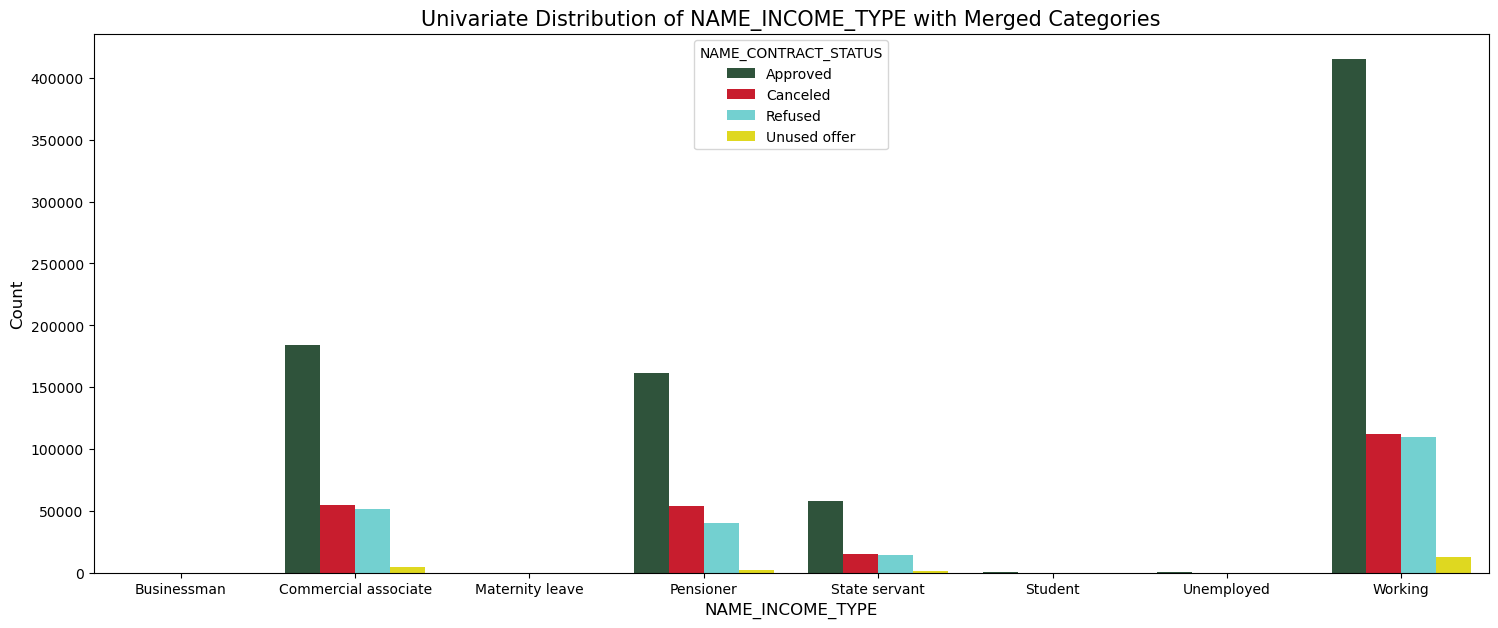

In [227]:
univariate_merged("NAME_INCOME_TYPE", all_rep_merged_df, "NAME_CONTRACT_STATUS", ["#295939", "#e40017", "#64dfdf", "#fff600"], (18, 7))

Repayers univariate analysis:
- Most approved loans lie in th working category.
- Least approved loans lie in the state servant category.


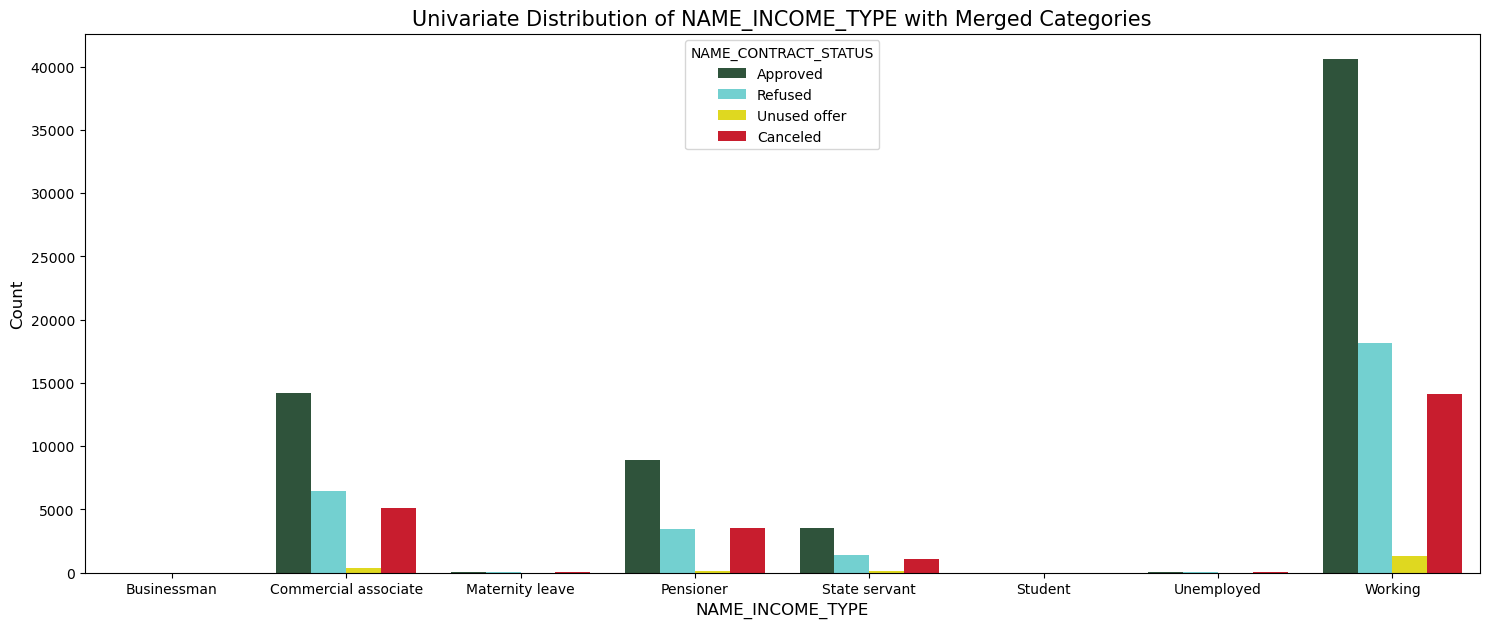

In [228]:
univariate_merged("NAME_INCOME_TYPE", all_def_merged_df, "NAME_CONTRACT_STATUS", ["#295939","#64dfdf","#fff600","#e40017"], (18, 7))

Defaulters univariate analysis:
- Most approved and most cancelled loans were from working category.
- Least approved and least cancelled loans were from state servant.

# Univariate Distribution of NAME_CLIENT_TYPE based on NAME_CONTRACT_STATUS

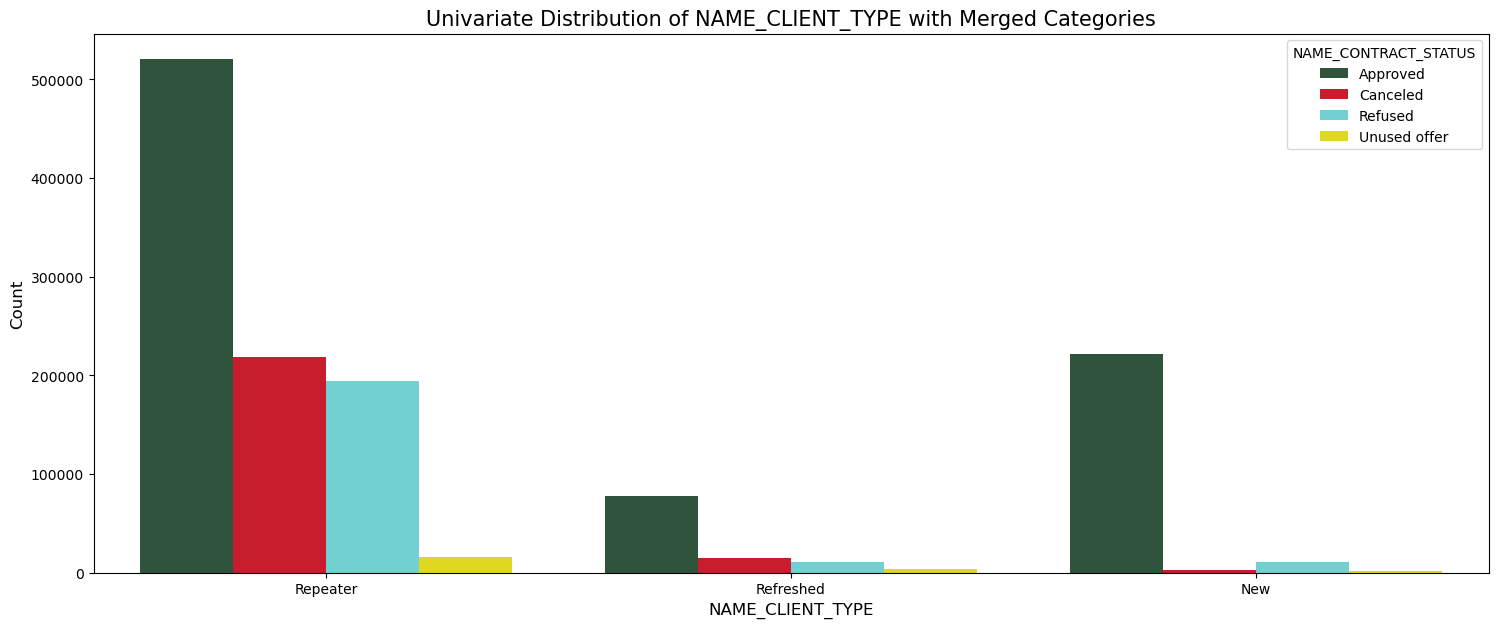

In [229]:
univariate_merged("NAME_CLIENT_TYPE", all_rep_merged_df, "NAME_CONTRACT_STATUS", ["#295939", "#e40017", "#64dfdf", "#fff600"], (18, 7))

Repayers merged dataset:
- Most approved loans are from repeater clients
- Least approved are from refreshed clients
- Least cancelled loans are from new clients

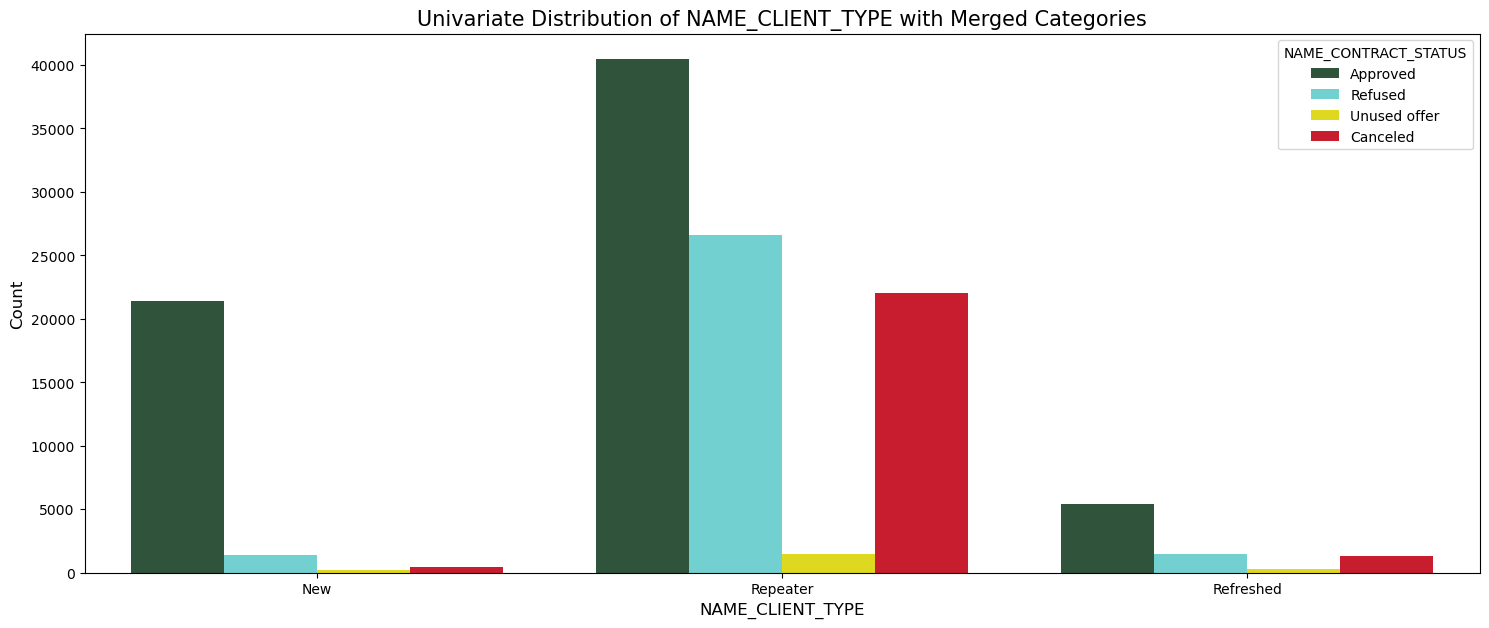

In [230]:
univariate_merged("NAME_CLIENT_TYPE", all_def_merged_df, "NAME_CONTRACT_STATUS", ["#295939","#64dfdf","#fff600","#e40017"], (18, 7))

Deafulters merged dataset:
- Most approved loans are from repeater clients.
- Least cancelled loans are from new clients.
- Least approved loans are from refreshed clients.

# Univariate Distribution of NAME_YEILD_GROUP based on NAME_CONTRACT_STATUS

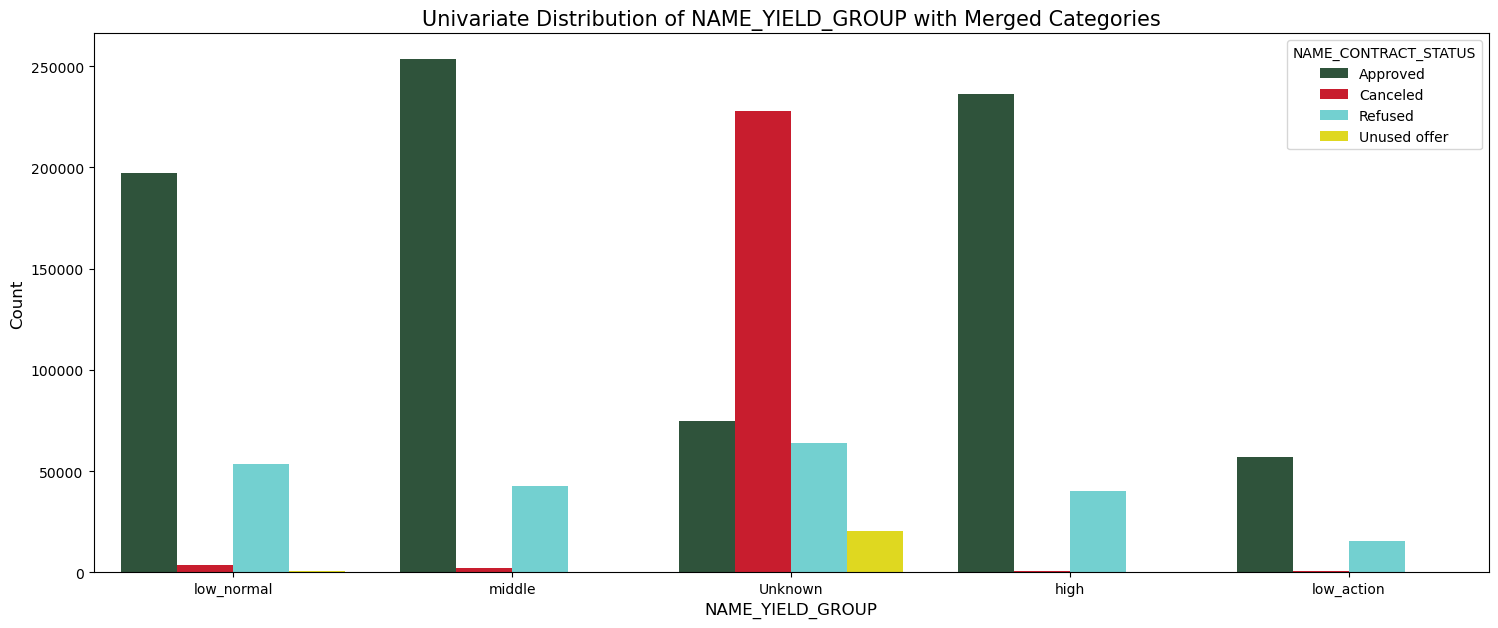

In [231]:
univariate_merged("NAME_YIELD_GROUP", all_rep_merged_df, "NAME_CONTRACT_STATUS", ["#295939", "#e40017", "#64dfdf", "#fff600"], (18, 7))

Repayers merged dataset:
- Most approved loans are which have average yield.
- Least approved loans are which have low yield.
- Most cancelled loans are which had yield in not mentioned. 

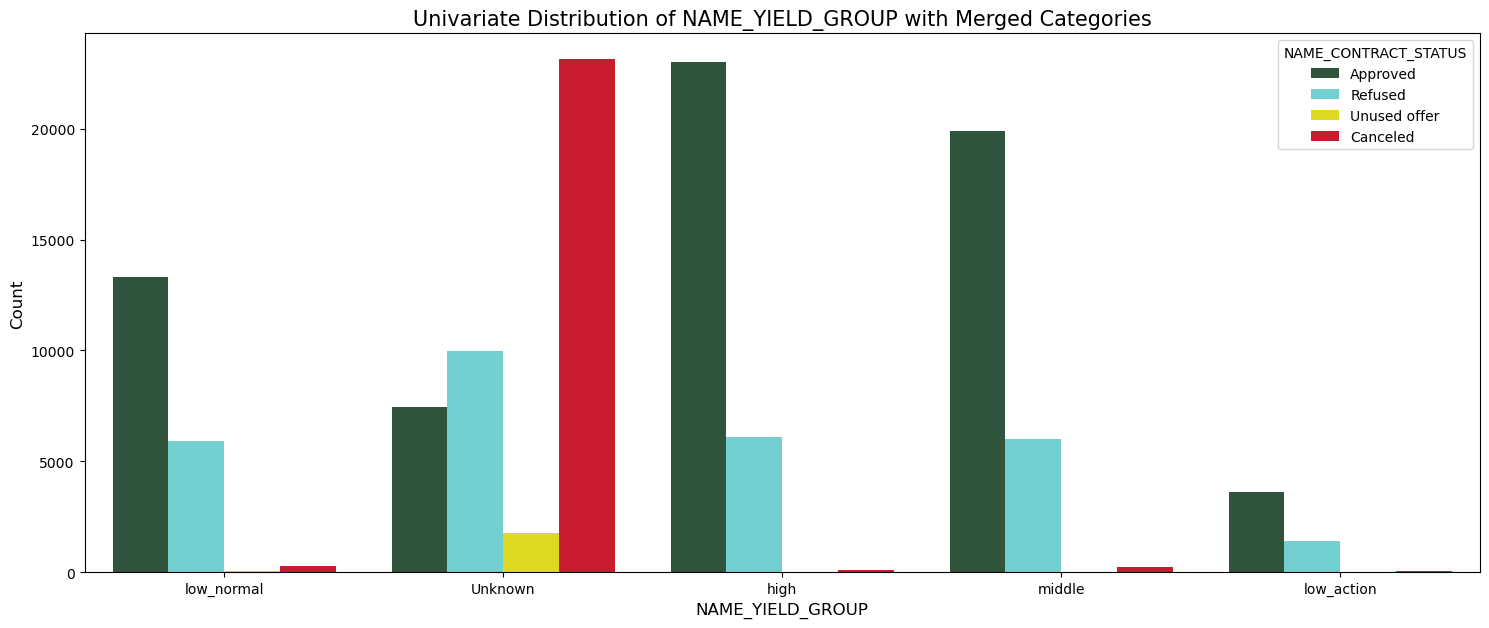

In [232]:
univariate_merged("NAME_YIELD_GROUP", all_def_merged_df, "NAME_CONTRACT_STATUS", ["#295939","#64dfdf","#fff600","#e40017"], (18, 7))

Defaulters merged dataset:
- Most approved loans are from hield yield group.
- Most cancelled loans are from unknowl yield group.
- Least approved loans are from low yield group.

# Univariate Distribution of CHANNEL_TYPE based on NAME_CONTRACT_STATUS

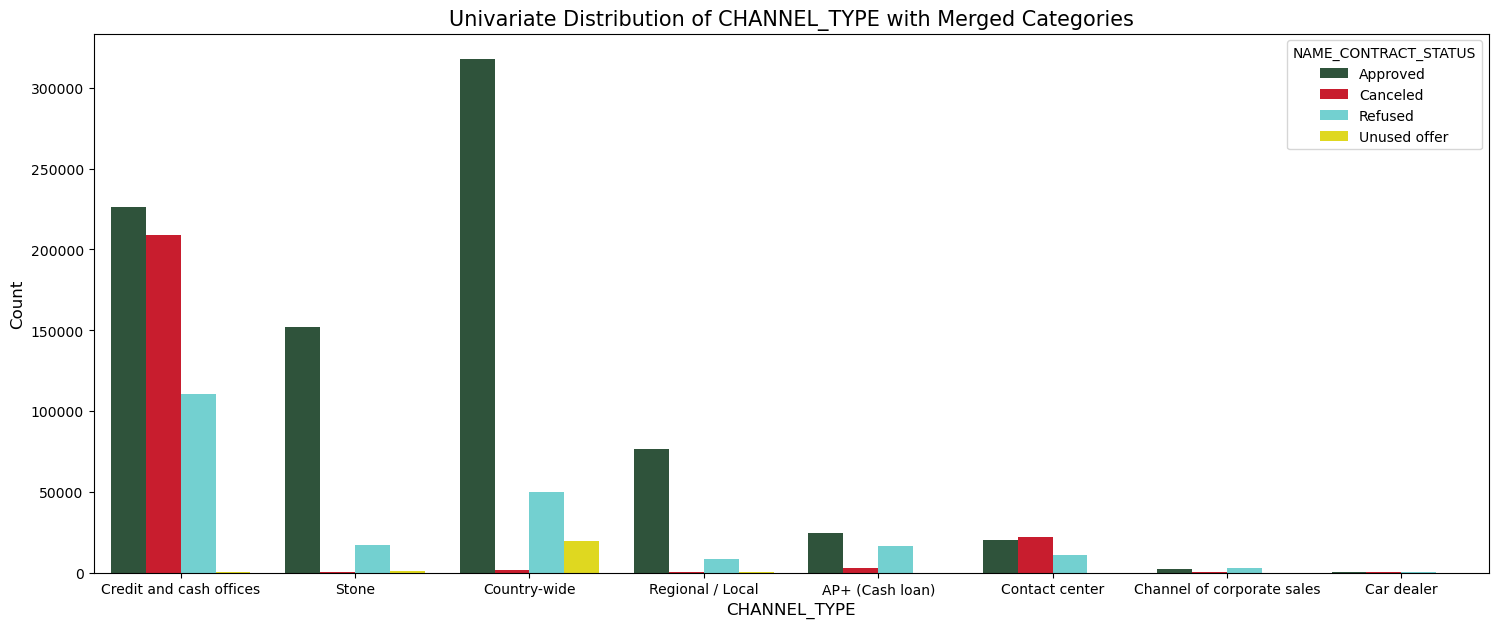

In [233]:
univariate_merged("CHANNEL_TYPE", all_rep_merged_df, "NAME_CONTRACT_STATUS", ["#295939", "#e40017", "#64dfdf", "#fff600"], (18, 7))

Repayers merged dataset:
- Highest loan approval is from country wide channel type.
- Lowest loan approval is from car dealers
- Highest cancellation of loans is from credit and cash offices.

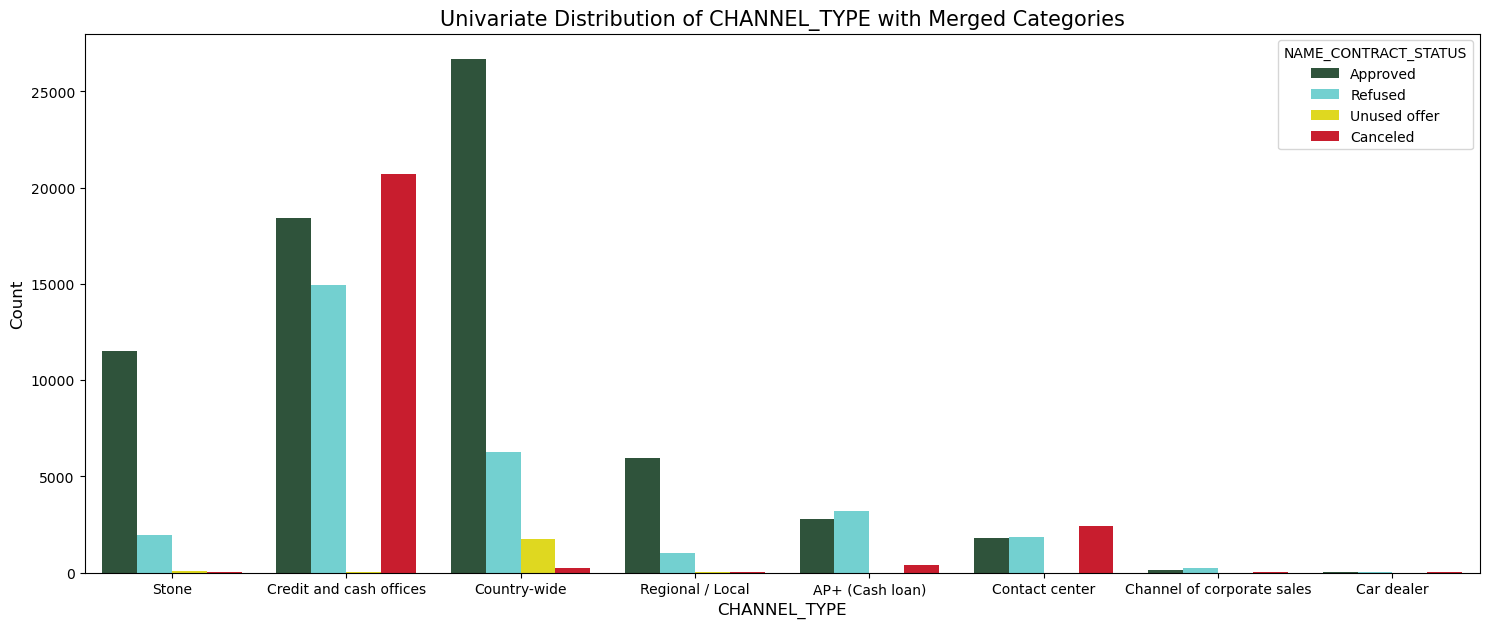

In [234]:
univariate_merged("CHANNEL_TYPE", all_def_merged_df, "NAME_CONTRACT_STATUS", ["#295939","#64dfdf","#fff600","#e40017"], (18, 7))

Defaulters merged dataset:
- Highest loan approvals are from country wide channel.
- Highest cancellations are from credit and cash offices.
- Lowest approvals are from car dealers and channel of corporate sales

# More analysis on merged data

In [235]:
def plot_pointplot(dataframe, x_column, y_column, hue_column):
    plt.figure(figsize=(12, 6))
    custom_palette = sns.color_palette("muted")
    sns.pointplot(x=x_column, y=y_column, hue=hue_column, data=dataframe, palette=custom_palette)
    plt.title(f'{x_column} vs {y_column}', fontsize=15)
    plt.show()

# Point Plot b/w contract status and total income

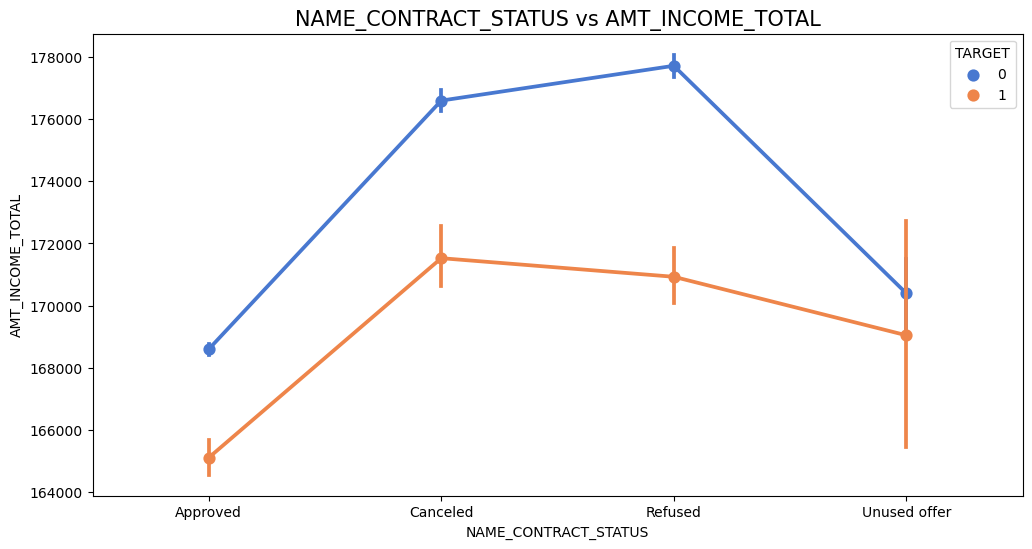

In [236]:
plot_pointplot(merged_application_df,"NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL',"TARGET")

Even after clients that have income in the higher ranges they still are the highest defaulters for majority of the time

# Point Plot b/w contract status and 60 days past due social circle defaulters

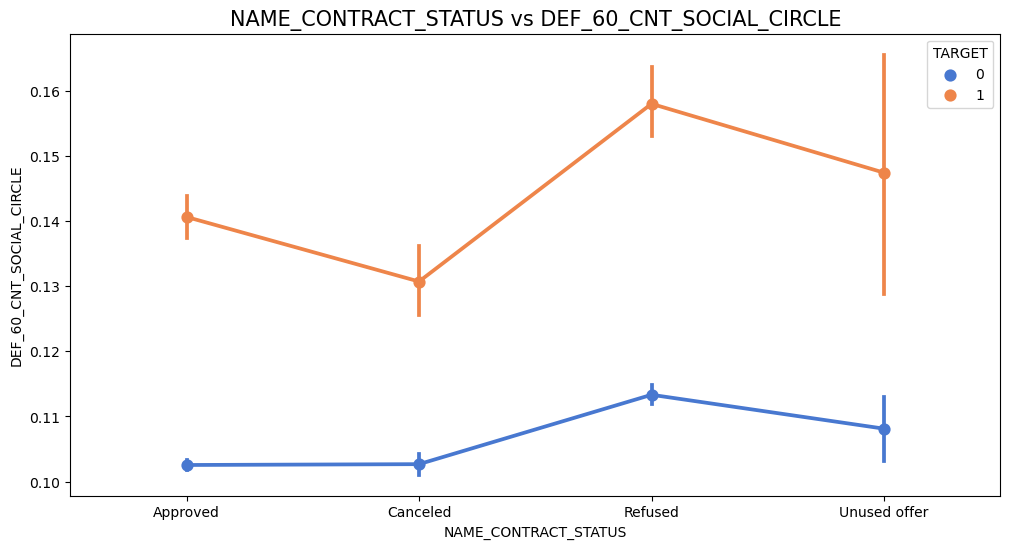

In [237]:
plot_pointplot(merged_application_df,"NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE',"TARGET")

People who have more than 60 days past due defaulters in their area tend to be careful about their repayments

# Point Plot b/w name contract status and days employed

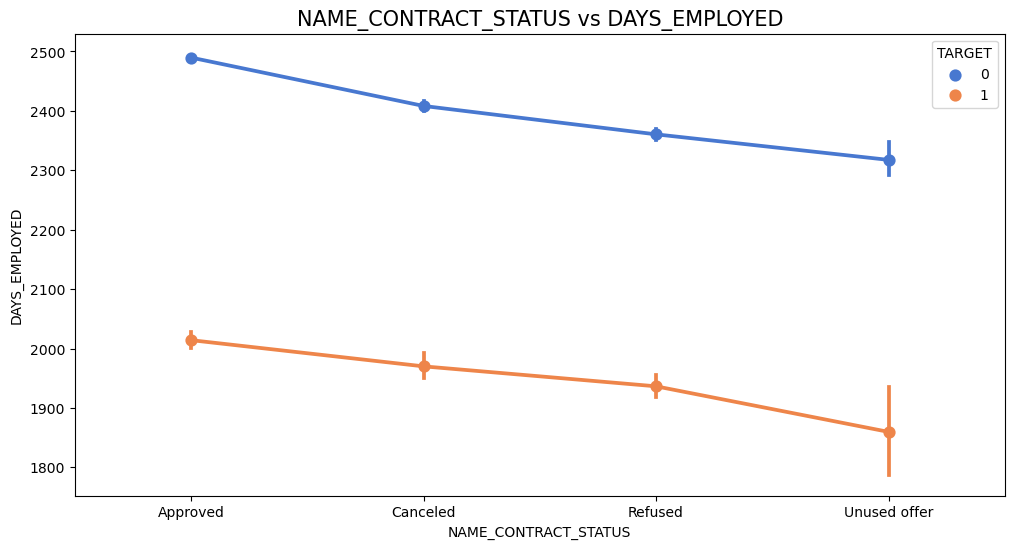

In [238]:
plot_pointplot(merged_application_df,"NAME_CONTRACT_STATUS",'DAYS_EMPLOYED',"TARGET")

People who are recently employed tend to be repayers but people with older employments have a larger number of defaulters

# Conclusions:

- The comprehensive analysis reveals that 91.93% of loan applicants are timely repayers, while 8.07% default on their loans. 
- Cash loans experience a slightly higher default rate (8.3%) compared to revolving loans (5.5%). 
- The risk of defaulting does not show a clear pattern concerning the amount of pending credit, with most defaulters having pending credit amounts between 2.5 to 7.5 lakh. 
- Gender-wise, males have a higher default rate (10.1%) compared to females (7%). 
- Educational background impacts default rates, with individuals holding lower secondary education posing the highest risk (10.9%), whereas those with academic degrees are least likely to default (1.8%). 
- Employment status is a significant determinant, with the highest default rates observed among applicants on maternity leave (40%) and unemployed applicants (36.4%). Yet, students and businessmen exhibit the lowest risk, having no record of default. 
- Income analysis suggests that higher income applicants are generally more reliable, with defaulters typically earning less. 
- Age-wise, older applicants (65+ years) and the very young (21-22 years) show lower default rates. 
- However, certain correlations, such as between pending credit amount and goods price, suggest that higher loan amounts are sought for more expensive goods, indicating potential risk factors. 
- Despite these findings, no definitive pattern emerges to predict default based on factors like family status or income alone, underscoring the complexity of assessing loan default risk.


# Factors if an applicant will be Repayer:

- Higher total income emerges as a decisive factor, indicating a positive correlation between income level and the likelihood of being a repayer. 
- Applicants with stable employment and higher income demonstrate a more reliable repayment pattern.


# Factors if an applicant will be Defaulter:

- The analysis points to various risk factors contributing to loan default, including lower income levels, certain employment statuses (e.g., being on maternity leave or unemployed), and educational background, with lower secondary education posing higher default risks. 
- These factors collectively indicate a multifaceted set of circumstances influencing the likelihood of being a defaulter.

# Factors to mitigate any default risk leading to business loss:  

- Applicants with higher pending credit amounts, particularly in the range of 2.5 to 7.5 lakh, pose a potential risk. To mitigate this risk, loans could be considered for such applicants, but with the imposition of higher interest rates to offset potential default losses. 
- Additionally, caution should be exercised when dealing with applicants on maternity leave or those currently unemployed.

# Suggestions:

- Offering lower interest rates to applicants with strong financial profiles and higher rates to those with riskier profiles may help balance business objectives with risk mitigation. 
- Conducting a comprehensive review of employment and income stability, along with educational background, will provide a more nuanced understanding of an applicant's creditworthiness. 
- Additionally, exploring targeted financial education initiatives for applicants with higher default risks could contribute to better financial decision-making and potentially reduce default rates.

